# 🧠 Complete Guide to Neural Networks & ML Interpretability



![Neural Network Success](https://miro.medium.com/v2/resize:fit:1400/1*bhFifratH9DjKqMBTeQG5A.gif)

---

## 🎯 What You'll Master Today

By the end of this journey, you will:

✅ **Understand** neural network fundamentals (matrices, architecture, activation functions)  
✅ **Build** your first neural network from scratch  
✅ **Master** optimization techniques and hyperparameter tuning  
✅ **Apply** regularization and early stopping  
✅ **Distinguish** between interpretable and black-box models  
✅ **Explain** complex models using LIME  
✅ **Make informed decisions** about model selection  

---


### **Part 1: Neural Network Fundamentals** 
1. **Matrices & Tensors** - The building blocks
2. **Neural Network Architecture** - How networks think
3. **Activation Functions** - Adding non-linearity
4. **Gradient Descent** - How networks learn
5. **Building Your First Network** - Hands-on practice

### **Part 2: Advanced Neural Networks** 
6. **Optimization Algorithms** - Better learning strategies
7. **Regularization Techniques** - Preventing overfitting
8. **Weight Initialization** - Starting right
9. **Early Stopping & Validation** - Smart training
10. **Hyperparameter Tuning** - Finding the sweet spot

### **Part 3: Model Interpretability** 
11. **White-Box vs Black-Box Models** - Understanding the trade-offs
12. **LIME for Neural Networks** - Making black boxes transparent
13. **Practical Applications** - Real-world examples

---

## 🚀 Let's Begin!

# Part 1: Neural Network Fundamentals 🧠

## 🔢 Matrices & Tensors: The Foundation

Neural networks are essentially **mathematical functions** that process data through matrix operations. Let's understand the building blocks:


### What are Tensors?

**Think of tensors like containers for data:**

- **Scalar (0D tensor)**: A single number → `5`
- **Vector (1D tensor)**: A list of numbers → `[1, 2, 3, 4]`
- **Matrix (2D tensor)**: A table of numbers → `[[1, 2], [3, 4]]`
- **Higher-D tensors**: Multi-dimensional arrays for images, videos, etc.

### Why Matrices Matter in Neural Networks

**Real-world analogy**: Imagine a neural network as a **factory assembly line**:
- Raw materials (input data) enter as vectors
- Each workstation (layer) transforms the data using matrix multiplication
- The final product (output) emerges at the end

**Mathematical representation:**
```
Output = Input × Weights + Bias
```

Where:
- **Input**: Your data (e.g., pixel values of an image)
- **Weights**: What the network learns (like skill levels of workers)
- **Bias**: Fine-tuning adjustment (like quality control)

## 🛠️ Setup: Import Essential Libraries

Let's start by importing everything we need for our neural network journey:

In [30]:
# Essential libraries for neural networks and ML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow/Keras for neural networks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.datasets import mnist, fashion_mnist

# Scikit-learn for traditional ML and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# For visualization
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Configure plotting
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)

print("🎉 All libraries loaded successfully!")
print(f"TensorFlow version: {tf.__version__}")

🎉 All libraries loaded successfully!
TensorFlow version: 2.18.0


### 🧮 Let's See Matrix Operations in Action!

🏠 HOW NEURAL NETWORKS PROCESS DATA
Step 1: Our Houses (like a spreadsheet)
----------------------------------------
House 1: 2 bed, 1 bath, 1200 sqft, 5 years old
House 2: 3 bed, 2 bath, 1800 sqft, 2 years old
House 3: 4 bed, 3 bath, 2500 sqft, 10 years old

Step 2: Convert to numbers (3 houses × 4 features)
Houses as numbers:
   Beds Bath  Size Age
H1   2    1   1200   5
H2   3    2   1800   2
H3   4    3   2500  10

Step 3: Neural Network has 2 EXPERTS
----------------------------------------
Expert 1: 'Location Value Assessor' - focuses on size and bathrooms
Expert 2: 'Condition Assessor' - focuses on age and bedrooms

Step 4: How much each expert cares about each feature
Feature:     Expert1  Expert2
Bedrooms:      0.1      0.2   (Expert2 cares more about bedrooms)
Bathrooms:     0.3      0.1   (Expert1 cares more about bathrooms)
Size:       0.0005   0.0002   (Both like bigger houses)
Age:        -0.05     -0.1    (Both dislike older houses)

Step 5: Each expert evaluates each hou

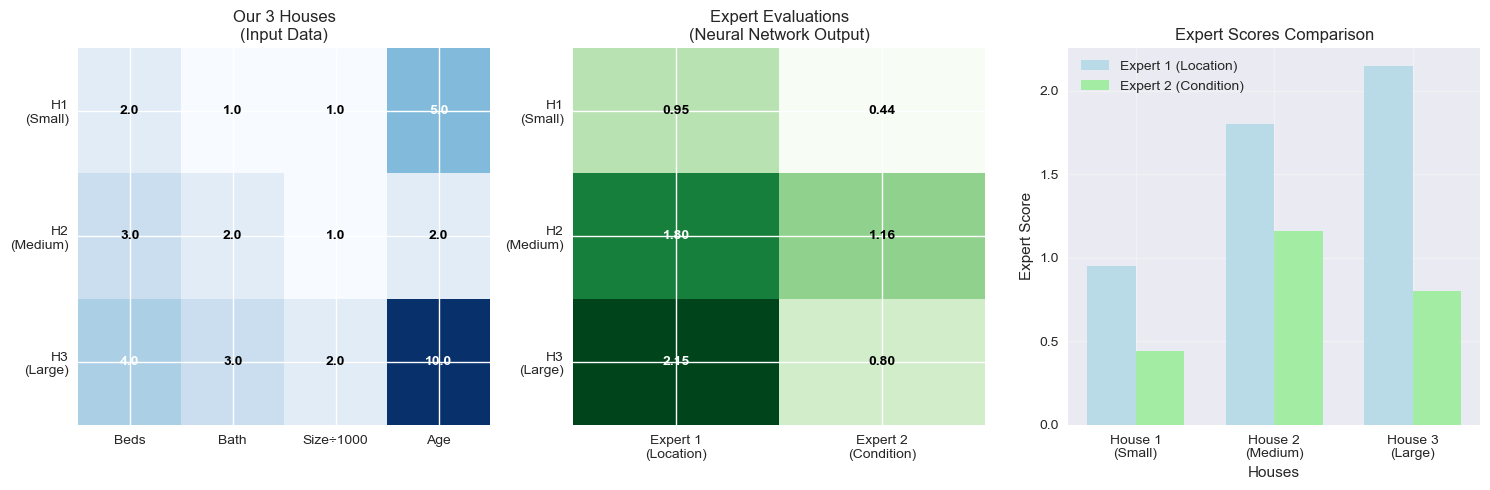


💡 KEY INSIGHTS:
✅ We had 3 houses (rows) and got 3 evaluations back
✅ Each house was evaluated by 2 experts (columns) = 3×2 output
✅ Expert 1 likes bigger houses with more bathrooms
✅ Expert 2 focuses more on bedrooms and dislikes old houses
✅ This is exactly how neural networks work - multiple 'experts' (neurons)
   each focus on different patterns in the data!


In [31]:
# 🏠 Think of this like a HOUSE EVALUATION SYSTEM!
print("🏠 HOW NEURAL NETWORKS PROCESS DATA")
print("=" * 40)

# 🏡 We have 3 houses to evaluate
print("Step 1: Our Houses (like a spreadsheet)")
print("-" * 40)

houses = [
    {"bedrooms": 2, "bathrooms": 1, "size": 1200, "age": 5},   # Small house
    {"bedrooms": 3, "bathrooms": 2, "size": 1800, "age": 2},   # Medium house  
    {"bedrooms": 4, "bathrooms": 3, "size": 2500, "age": 10}   # Large house
]

# Show houses in a table format
for i, house in enumerate(houses, 1):
    print(f"House {i}: {house['bedrooms']} bed, {house['bathrooms']} bath, {house['size']} sqft, {house['age']} years old")

# Convert to numbers (this is what computers see)
X = np.array([[2, 1, 1200, 5],   # House 1 as numbers
              [3, 2, 1800, 2],   # House 2 as numbers  
              [4, 3, 2500, 10]])  # House 3 as numbers

print(f"\nStep 2: Convert to numbers (3 houses × 4 features)")
print("Houses as numbers:")
print("   Beds Bath  Size Age")
for i, row in enumerate(X, 1):
    print(f"H{i}  {row[0]:2.0f}   {row[1]:2.0f}   {row[2]:4.0f}  {row[3]:2.0f}")

# 🧠 The Neural Network has 2 "experts" (neurons)
print(f"\nStep 3: Neural Network has 2 EXPERTS")
print("-" * 40)
print("Expert 1: 'Location Value Assessor' - focuses on size and bathrooms")
print("Expert 2: 'Condition Assessor' - focuses on age and bedrooms")

# Each expert has different opinions (weights) about what's important
expert1_weights = [0.1, 0.3, 0.0005, -0.05]  # Cares about bathrooms and size
expert2_weights = [0.2, 0.1, 0.0002, -0.1]   # Cares about bedrooms, less about age

print(f"\nStep 4: How much each expert cares about each feature")
print("Feature:     Expert1  Expert2")
print("Bedrooms:      0.1      0.2   (Expert2 cares more about bedrooms)")
print("Bathrooms:     0.3      0.1   (Expert1 cares more about bathrooms)")  
print("Size:       0.0005   0.0002   (Both like bigger houses)")
print("Age:        -0.05     -0.1    (Both dislike older houses)")

# 🧮 Calculate each expert's opinion for each house
print(f"\nStep 5: Each expert evaluates each house")
print("-" * 50)

results = []
for i, house_data in enumerate(X, 1):
    # Expert 1's calculation
    expert1_score = (house_data[0] * expert1_weights[0] +    # bedrooms
                     house_data[1] * expert1_weights[1] +    # bathrooms  
                     house_data[2] * expert1_weights[2] +    # size
                     house_data[3] * expert1_weights[3] +    # age
                     0.1)  # expert1's bias
    
    # Expert 2's calculation  
    expert2_score = (house_data[0] * expert2_weights[0] +    # bedrooms
                     house_data[1] * expert2_weights[1] +    # bathrooms
                     house_data[2] * expert2_weights[2] +    # size  
                     house_data[3] * expert2_weights[3] +    # age
                     0.2)  # expert2's bias
    
    print(f"House {i}: Expert1={expert1_score:.2f}, Expert2={expert2_score:.2f}")
    results.append([expert1_score, expert2_score])

# Convert results to array (this is our Z1!)
Z1 = np.array(results)

print(f"\nStep 6: Final Results Summary")
print("-" * 30)
print("Shape of results: 3 houses × 2 experts = (3, 2)")
print("\nWhat the numbers mean:")
print("- Higher Expert1 score = Better location/size value")  
print("- Higher Expert2 score = Better condition/bedroom value")
print(f"\nResults array:")
print("      Expert1  Expert2")
for i, row in enumerate(Z1, 1):
    print(f"H{i}    {row[0]:6.2f}   {row[1]:6.2f}")

# 📊 Visual Summary
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. Show houses as a simple table-like visualization
house_labels = ['H1\n(Small)', 'H2\n(Medium)', 'H3\n(Large)']
feature_labels = ['Beds', 'Bath', 'Size÷1000', 'Age']

# Normalize size for better visualization
X_viz = X.copy()
X_viz[:, 2] = X_viz[:, 2] / 1000  # Convert size to thousands

im1 = axes[0].imshow(X_viz, cmap='Blues', aspect='auto')
axes[0].set_title('Our 3 Houses\n(Input Data)')
axes[0].set_xticks(range(4))
axes[0].set_xticklabels(feature_labels)
axes[0].set_yticks(range(3))
axes[0].set_yticklabels(house_labels)
for i in range(3):
    for j in range(4):
        axes[0].text(j, i, f'{X_viz[i,j]:.1f}', ha='center', va='center', 
                    color='white' if X_viz[i,j] > X_viz.mean() else 'black', fontweight='bold')

# 2. Show expert scores
expert_labels = ['Expert 1\n(Location)', 'Expert 2\n(Condition)']
im2 = axes[1].imshow(Z1, cmap='Greens', aspect='auto')
axes[1].set_title('Expert Evaluations\n(Neural Network Output)')
axes[1].set_xticks(range(2))
axes[1].set_xticklabels(expert_labels)
axes[1].set_yticks(range(3))
axes[1].set_yticklabels(house_labels)
for i in range(3):
    for j in range(2):
        axes[1].text(j, i, f'{Z1[i,j]:.2f}', ha='center', va='center', 
                    color='white' if Z1[i,j] > Z1.mean() else 'black', fontweight='bold')

# 3. Show a simple bar chart comparison
house_names = ['House 1\n(Small)', 'House 2\n(Medium)', 'House 3\n(Large)']
x_pos = np.arange(len(house_names))
width = 0.35

axes[2].bar(x_pos - width/2, Z1[:, 0], width, label='Expert 1 (Location)', alpha=0.8, color='lightblue')
axes[2].bar(x_pos + width/2, Z1[:, 1], width, label='Expert 2 (Condition)', alpha=0.8, color='lightgreen')
axes[2].set_title('Expert Scores Comparison')
axes[2].set_xlabel('Houses')
axes[2].set_ylabel('Expert Score')
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(house_names)
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 KEY INSIGHTS:")
print("=" * 40)
print("✅ We had 3 houses (rows) and got 3 evaluations back")
print("✅ Each house was evaluated by 2 experts (columns) = 3×2 output")
print("✅ Expert 1 likes bigger houses with more bathrooms")
print("✅ Expert 2 focuses more on bedrooms and dislikes old houses")
print("✅ This is exactly how neural networks work - multiple 'experts' (neurons)")
print("   each focus on different patterns in the data!")


Step: Add a 'Final Decision Maker' (Output Layer)
-------------------------------------------------------
Final Decision Maker's strategy:
- Expert 1's opinion is worth $150,000 per point
- Expert 2's opinion is worth $120,000 per point
- Base house price: $200,000

Calculating Final House Prices:
----------------------------------------
House 1: (0.95 × $150,000) + (0.44 × $120,000) + $200,000
       = $142,500 + $52,800 + $200,000
       = $395,300

House 2: (1.80 × $150,000) + (1.16 × $120,000) + $200,000
       = $270,000 + $139,200 + $200,000
       = $609,200

House 3: (2.15 × $150,000) + (0.80 × $120,000) + $200,000
       = $322,500 + $96,000 + $200,000
       = $618,500

🎉 FINAL RESULTS:
From 3×2 expert opinions → 3×1 final predictions

Final house prices:
House 1 (Small ): $395,300
House 2 (Medium): $609,200
House 3 (Large ): $618,500


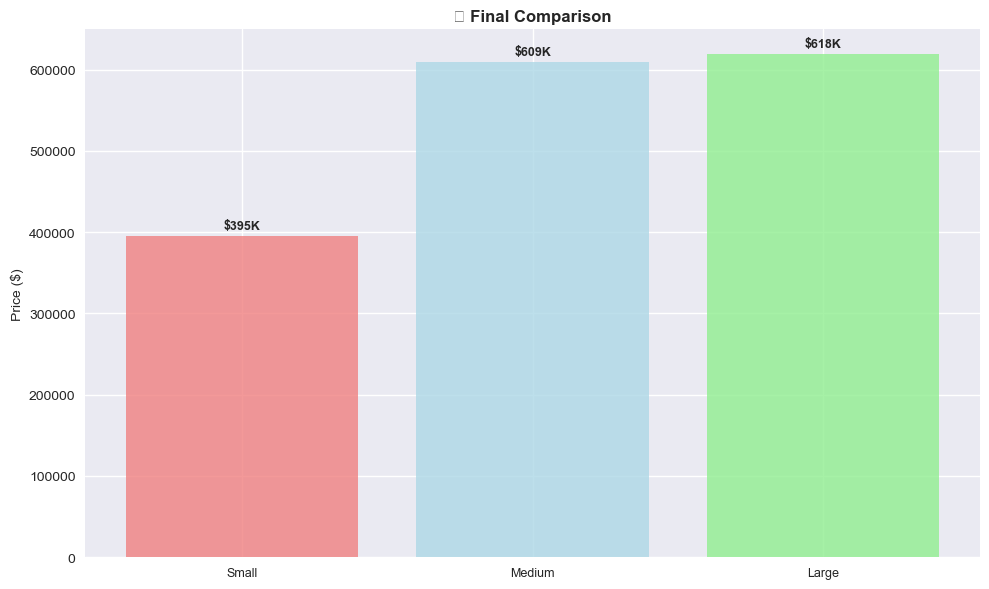


🔄 NEURAL NETWORK COMPLETE FLOW:
📥 INPUT:   3 houses × 4 features    = (3,4) shape
              ↓
🧠 HIDDEN:  3 houses × 2 experts     = (3,2) shape
              ↓
💰 OUTPUT:  3 houses × 1 final price = (3,1) shape

✅ ANSWER TO YOUR QUESTION:
   We get 1 final value by adding an OUTPUT LAYER
   that combines the 2 expert opinions using weights!
   This is how ALL neural networks work - layer by layer!


In [ ]:
# 🎯 HOW TO GET 1 FINAL PREDICTION FROM 2 EXPERTS

# 🧠 Add another layer - the "Final Decision Maker"
print(f"\nStep: Add a 'Final Decision Maker' (Output Layer)")
print("-" * 55)

# The final decision maker has weights for how much to trust each expert
final_weights = np.array([150000, 120000])  # How much each expert's opinion is worth in dollars
final_bias = 200000  # Base house price

print("Final Decision Maker's strategy:")
print(f"- Expert 1's opinion is worth ${final_weights[0]:,} per point")
print(f"- Expert 2's opinion is worth ${final_weights[1]:,} per point") 
print(f"- Base house price: ${final_bias:,}")

# Calculate final predictions (this is the output layer!)
print(f"\nCalculating Final House Prices:")
print("-" * 40)

final_predictions = []
for i, expert_scores in enumerate(Z1, 1):
    # Final prediction = (Expert1_score × weight1) + (Expert2_score × weight2) + bias
    final_price = (expert_scores[0] * final_weights[0] + 
                   expert_scores[1] * final_weights[1] + 
                   final_bias)
    
    final_predictions.append(final_price)
    
    print(f"House {i}: ({expert_scores[0]:.2f} × ${final_weights[0]:,}) + ({expert_scores[1]:.2f} × ${final_weights[1]:,}) + ${final_bias:,}")
    print(f"       = ${expert_scores[0] * final_weights[0]:,.0f} + ${expert_scores[1] * final_weights[1]:,.0f} + ${final_bias:,}")
    print(f"       = ${final_price:,.0f}")
    print()

# Convert to numpy array
final_predictions = np.array(final_predictions)

print("🎉 FINAL RESULTS:")
print("=" * 20)
print("From 3×2 expert opinions → 3×1 final predictions")
print("\nFinal house prices:")
for i, price in enumerate(final_predictions, 1):
    house_type = ["Small", "Medium", "Large"][i-1]
    print(f"House {i} ({house_type:6}): ${price:,.0f}")


plt.title("Final Comparison", fontweight='bold', fontsize=12)
house_names = ['Small', 'Medium', 'Large']
colors = ['lightcoral', 'lightblue', 'lightgreen']
bars = plt.bar(house_names, final_predictions, color=colors, alpha=0.8)
plt.ylabel('Price ($)', fontsize=10)
plt.xticks(fontsize=9)
# Add price labels on bars
for bar, price in zip(bars, final_predictions):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5000,
             f'${price/1000:.0f}K', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\n🔄 NEURAL NETWORK COMPLETE FLOW:")
print("=" * 40)
print("📥 INPUT:   3 houses × 4 features    = (3,4) shape")
print("              ↓")  
print("🧠 HIDDEN:  3 houses × 2 experts     = (3,2) shape")
print("              ↓")
print("💰 OUTPUT:  3 houses × 1 final price = (3,1) shape")
print()
print("✅ ANSWER TO YOUR QUESTION:")
print("   We get 1 final value by adding an OUTPUT LAYER")
print("   that combines the 2 expert opinions using weights!")
print("   This is how ALL neural networks work - layer by layer!")

## 🏗️ Neural Network Architecture

Neural networks are inspired by the human brain, but much simpler! Let's understand how they're organized:

![Neural Network Architecture](https://miro.medium.com/v2/resize:fit:1400/1*3fA77_mLNiJTSgZFhYnU0Q.png)

### 🧠 The Basic Structure

**Think of a neural network as a team of decision-makers:**

1. **Input Layer** 🎯
   - **What it does**: Receives raw data (like pixels of an image)
   - **Analogy**: Your eyes taking in visual information
   - **Example**: 784 neurons for a 28×28 pixel image

2. **Hidden Layers** 🔍
   - **What they do**: Process and transform the data
   - **Analogy**: Your brain analyzing and recognizing patterns
   - **Example**: Multiple layers with 128, 64, 32 neurons each

3. **Output Layer** 📤
   - **What it does**: Makes the final prediction
   - **Analogy**: Your mouth speaking the final decision
   - **Example**: 10 neurons for classifying 10 different digits (0-9)

### 🔗 How Neurons Connect

**Each neuron performs a simple calculation:**
```
Neuron Output = Activation Function(Weighted Sum of Inputs + Bias)
```

**Step by step:**
1. **Receive inputs** from previous layer
2. **Multiply each input** by its weight (importance)
3. **Sum everything up** and add a bias
4. **Apply activation function** to get the output

### 📊 Common Network Types

#### **Feedforward Networks** (Most Common)
- Data flows in one direction: Input → Hidden → Output
- Good for: Classification, regression, basic predictions

#### **Deep Networks**
- Many hidden layers (3+ layers = "deep")
- Good for: Complex patterns, images, text, speech

**Rule of thumb**: Start simple, add complexity only if needed!

## ⚡ Activation Functions: Adding Intelligence

Activation functions are the **"decision makers"** in neural networks. They decide whether a neuron should be activated (fire) or not.

![Activation Functions](https://miro.medium.com/v2/resize:fit:1400/1*4ZEDRpFuCIpUjNgjDdT2Lg.png)

### 🤔 Why Do We Need Activation Functions?

**Without activation functions**: Neural network = just a linear regression (boring!)  
**With activation functions**: Neural network = can learn complex, non-linear patterns (exciting!)


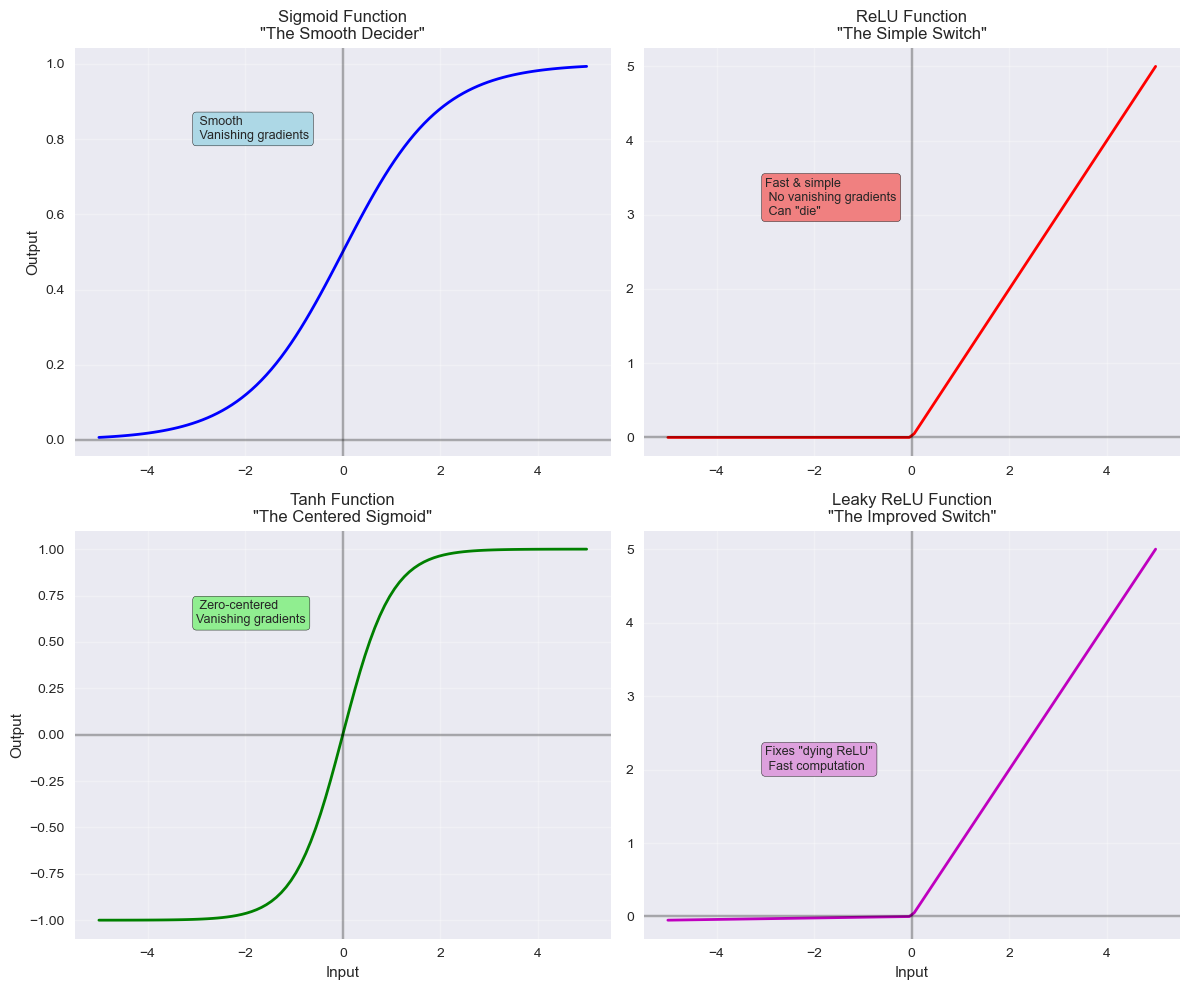

🎯 ACTIVATION FUNCTION CHEAT SHEET
🔸 ReLU (Rectified Linear Unit): Most popular for hidden layers
  → Fast, simple, prevents vanishing gradients
  → Use when: Building most neural networks

🔸 Sigmoid: Good for binary classification output
  → Outputs between 0 and 1 (perfect for probabilities)
  → Use when: Binary classification (yes/no, spam/not spam)

🔸 Softmax: Perfect for multi-class classification output
  → Outputs sum to 1 (perfect for probability distribution)
  → Use when: Multi-class classification (cat/dog/bird)

💡 Rule of thumb:
  Hidden layers: ReLU or Leaky ReLU
  Output layer: Sigmoid (binary) or Softmax (multi-class)


In [33]:
# Let's visualize the most common activation functions
x = np.linspace(-5, 5, 100)

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))  # Clip to prevent overflow

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Sigmoid
axes[0,0].plot(x, sigmoid(x), 'b-', linewidth=2, label='Sigmoid')
axes[0,0].set_title('Sigmoid Function\n"The Smooth Decider"')
axes[0,0].set_ylabel('Output')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[0,0].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axes[0,0].text(-3, 0.8, ' Smooth\n Vanishing gradients', fontsize=9, 
               bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))

# ReLU  
axes[0,1].plot(x, relu(x), 'r-', linewidth=2, label='ReLU')
axes[0,1].set_title('ReLU Function\n"The Simple Switch"')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[0,1].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axes[0,1].text(-3, 3, 'Fast & simple\n No vanishing gradients\n Can "die"', 
               fontsize=9, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"))

# Tanh
axes[1,0].plot(x, tanh(x), 'g-', linewidth=2, label='Tanh')
axes[1,0].set_title('Tanh Function\n"The Centered Sigmoid"')
axes[1,0].set_xlabel('Input')
axes[1,0].set_ylabel('Output')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[1,0].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axes[1,0].text(-3, 0.6, ' Zero-centered\nVanishing gradients', 
               fontsize=9, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))

# Leaky ReLU
axes[1,1].plot(x, leaky_relu(x), 'm-', linewidth=2, label='Leaky ReLU')
axes[1,1].set_title('Leaky ReLU Function\n"The Improved Switch"')
axes[1,1].set_xlabel('Input')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[1,1].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axes[1,1].text(-3, 2, 'Fixes "dying ReLU"\n Fast computation', 
               fontsize=9, bbox=dict(boxstyle="round,pad=0.3", facecolor="plum"))

plt.tight_layout()
plt.show()

print("🎯 ACTIVATION FUNCTION CHEAT SHEET")
print("=" * 40)
print("🔸 ReLU (Rectified Linear Unit): Most popular for hidden layers")
print("  → Fast, simple, prevents vanishing gradients")
print("  → Use when: Building most neural networks")
print()
print("🔸 Sigmoid: Good for binary classification output")
print("  → Outputs between 0 and 1 (perfect for probabilities)")
print("  → Use when: Binary classification (yes/no, spam/not spam)")
print()
print("🔸 Softmax: Perfect for multi-class classification output")
print("  → Outputs sum to 1 (perfect for probability distribution)")
print("  → Use when: Multi-class classification (cat/dog/bird)")
print()
print("💡 Rule of thumb:")
print("  Hidden layers: ReLU or Leaky ReLU")
print("  Output layer: Sigmoid (binary) or Softmax (multi-class)")

# Neural Network Concepts Explained Simply 🧠

## 🔇 Vanishing Gradients: The Whispering Game Problem

Imagine you're playing the whispering game with your friends in a long line:
- The first person whispers a message to the second person
- The second person whispers what they heard to the third person
- This continues down the line...

By the time the message reaches the end of the line, it's often completely different or barely audible!

**This is exactly what happens with vanishing gradients:**
- Neural networks learn by passing error messages backwards through layers
- Each layer weakens the message a little bit (like whispering)
- By the time the message reaches the first layers, it's so weak they barely learn anything
- This makes deep networks very hard to train effectively

## ⚡ ReLU: The Message Amplifier

Most activation functions (like sigmoid or tanh) are like people who whisper even quieter - they make the vanishing gradient problem worse.

**ReLU (Rectified Linear Unit) is different because:**
- It's like a person who either stays silent (outputs 0) or speaks clearly (passes the input unchanged)
- Formula: `max(0, x)` - if input is negative, output 0; if positive, output the input as-is
- It doesn't "squash" the gradients like other functions do
- This helps the error messages stay strong as they travel backwards
- Much simpler to compute (just a comparison and selection)

## 🎯 Weight Initialization: Starting the Game Right

**Weight initialization** is like deciding how loudly the first person should speak in our whispering game.

- **Too quiet (small weights):** The message gets weaker and weaker until it disappears
- **Too loud (large weights):** The message becomes distorted and chaotic
- **Just right:** The message travels clearly through the network

Good initialization methods (like Xavier or He initialization) help ensure that:
- Information flows properly forward through the network
- Error signals flow properly backward during learning
- The network starts training from a good "balanced" state

Think of it as tuning all the players in the whispering game to speak at just the right volume! 🎪

## 📈 Gradient Descent: How Neural Networks Learn

Gradient descent is the **"learning algorithm"** that helps neural networks get better over time. Think of it as **climbing down a hill to find the bottom**.

![Gradient Descent](https://miro.medium.com/v2/resize:fit:1400/1*f9a162GhpMbiTVTAua_lLQ.png)

### 🎯 The Learning Process

**The Goal**: Find the best weights that minimize prediction errors

**The Strategy**: 
1. **Make a prediction** with current weights
2. **Calculate the error** (how wrong were we?)
3. **Figure out the direction** to adjust weights (gradient)
4. **Take a small step** in that direction
5. **Repeat** until error is minimized

### 🏔️ The Mountain Analogy

Imagine you're **blindfolded on a mountain** and want to reach the bottom (minimum error):

- **Current position**: Your current weights
- **Altitude**: The error/loss of your model  
- **Slope**: The gradient (which way is downhill?)
- **Step size**: Learning rate (how big steps do you take?)

**Smart strategy**: Feel the slope, take a step downhill, repeat!

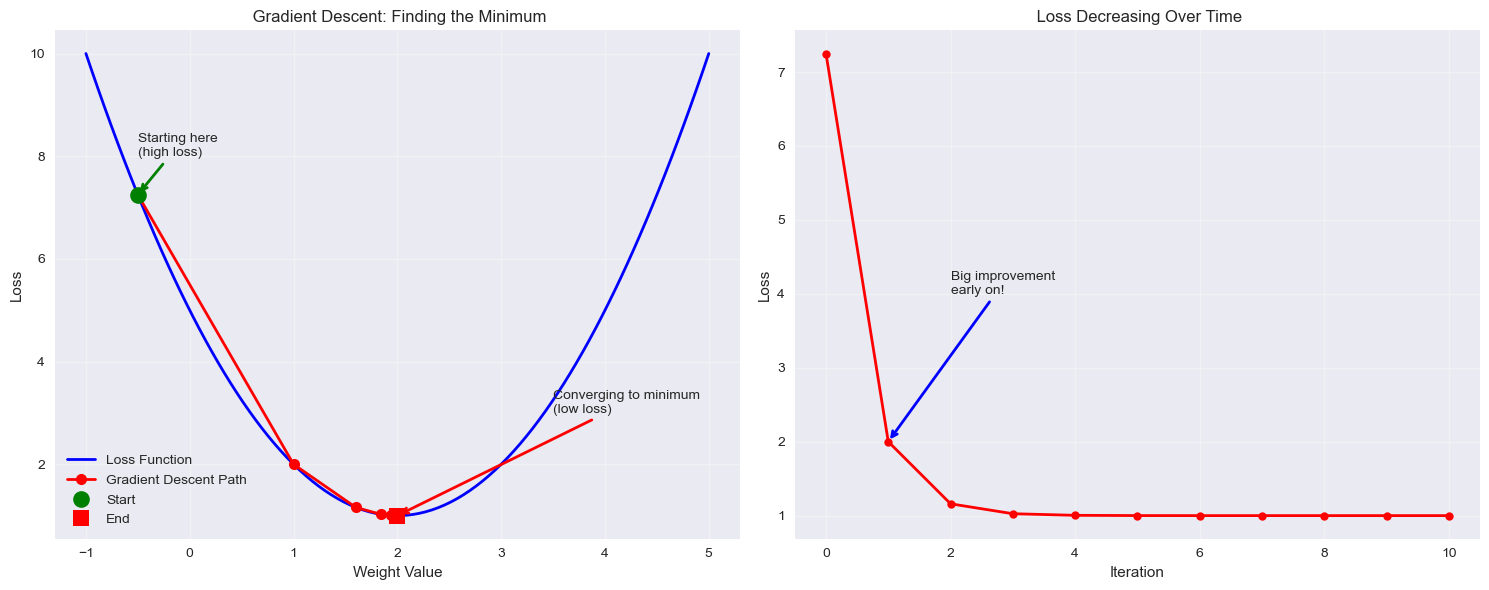

🎯 GRADIENT DESCENT KEY CONCEPTS
🏁 Started at weight: -0.500 (loss: 7.250)
🎯 Ended at weight: 2.000 (loss: 1.000)
📈 Loss reduced by: 86.2%
⚙️  Learning rate used: 0.3

💡 IMPORTANT PARAMETERS:
🔸 Learning Rate (α): How big steps to take
   • Too small → slow learning
   • Too large → might overshoot minimum
   • Typical values: 0.001 to 0.1

🔸 Gradient: Direction and steepness of slope
   • Positive → go left (decrease weight)
   • Negative → go right (increase weight)
   • Large magnitude → steep slope

🔸 Convergence: When to stop learning
   • Loss stops improving significantly
   • Gradient becomes very small
   • Reached maximum iterations


In [34]:
# Let's visualize gradient descent with a simple example
def loss_function(w):
    """A simple quadratic loss function"""
    return (w - 2)**2 + 1

def gradient(w):
    """Gradient (derivative) of our loss function"""
    return 2 * (w - 2)

# Create the loss landscape
w_range = np.linspace(-1, 5, 100)
loss_values = loss_function(w_range)

# Simulate gradient descent
learning_rate = 0.3
w_current = -0.5  # Starting point
w_history = [w_current]
loss_history = [loss_function(w_current)]

# Run gradient descent for 10 steps
for step in range(10):
    grad = gradient(w_current)
    w_current = w_current - learning_rate * grad  # Update weight
    w_history.append(w_current)
    loss_history.append(loss_function(w_current))

# Visualize the process
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Loss landscape with gradient descent path
ax1.plot(w_range, loss_values, 'b-', linewidth=2, label='Loss Function')
ax1.plot(w_history, loss_history, 'ro-', linewidth=2, markersize=8, label='Gradient Descent Path')
ax1.plot(w_history[0], loss_history[0], 'go', markersize=12, label='Start')
ax1.plot(w_history[-1], loss_history[-1], 'rs', markersize=12, label='End')
ax1.set_xlabel('Weight Value')
ax1.set_ylabel('Loss')
ax1.set_title(' Gradient Descent: Finding the Minimum')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add annotations for key points
ax1.annotate('Starting here\n(high loss)', xy=(w_history[0], loss_history[0]), 
             xytext=(-0.5, 8), arrowprops=dict(arrowstyle='->', color='green', lw=2))
ax1.annotate('Converging to minimum\n(low loss)', xy=(w_history[-1], loss_history[-1]), 
             xytext=(3.5, 3), arrowprops=dict(arrowstyle='->', color='red', lw=2))

# Plot 2: Loss over iterations
ax2.plot(range(len(loss_history)), loss_history, 'ro-', linewidth=2, markersize=6)
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Loss')
ax2.set_title(' Loss Decreasing Over Time')
ax2.grid(True, alpha=0.3)

# Highlight the dramatic initial improvement
ax2.annotate('Big improvement\nearly on!', xy=(1, loss_history[1]), 
             xytext=(2, loss_history[1] + 2), 
             arrowprops=dict(arrowstyle='->', color='blue', lw=2))

plt.tight_layout()
plt.show()

print("🎯 GRADIENT DESCENT KEY CONCEPTS")
print("=" * 35)
print(f"🏁 Started at weight: {w_history[0]:.3f} (loss: {loss_history[0]:.3f})")
print(f"🎯 Ended at weight: {w_history[-1]:.3f} (loss: {loss_history[-1]:.3f})")
print(f"📈 Loss reduced by: {((loss_history[0] - loss_history[-1])/loss_history[0]*100):.1f}%")
print(f"⚙️  Learning rate used: {learning_rate}")

print("\n💡 IMPORTANT PARAMETERS:")
print("=" * 25)
print("🔸 Learning Rate (α): How big steps to take")
print("   • Too small → slow learning")
print("   • Too large → might overshoot minimum")
print("   • Typical values: 0.001 to 0.1")
print()
print("🔸 Gradient: Direction and steepness of slope")
print("   • Positive → go left (decrease weight)")
print("   • Negative → go right (increase weight)")
print("   • Large magnitude → steep slope")
print()
print("🔸 Convergence: When to stop learning")
print("   • Loss stops improving significantly")
print("   • Gradient becomes very small")
print("   • Reached maximum iterations")

## 🚀 Building Your First Neural Network

Now let's put everything together and build a real neural network! We'll use the **housing prices dataset** - predicting house prices based on various features.

### 📊 The Dataset: Housing Prices

- **Multiple features** like lot area, year built, number of rooms, etc.
- **1,460 houses** with detailed information
- **Numerical and categorical features** for comprehensive modeling
- **Regression task**: Predicting the sale price of houses

### 🎯 Our Goal
Build a neural network that can look at house features and accurately predict the sale price!

🏠 HOUSING PRICES DATASET OVERVIEW
Number of houses: 1,460
Number of features: 81
Target variable: SalePrice

SalePrice statistics:
Mean: $180,921
Median: $163,000
Range: $34,900 - $755,000

First 5 houses:
   LotArea  YearBuilt  BedroomAbvGr  TotalBsmtSF  SalePrice
0     8450       2003             3          856     208500
1     9600       1976             3         1262     181500
2    11250       2001             3          920     223500
3     9550       1915             3          756     140000
4    14260       2000             4         1145     250000


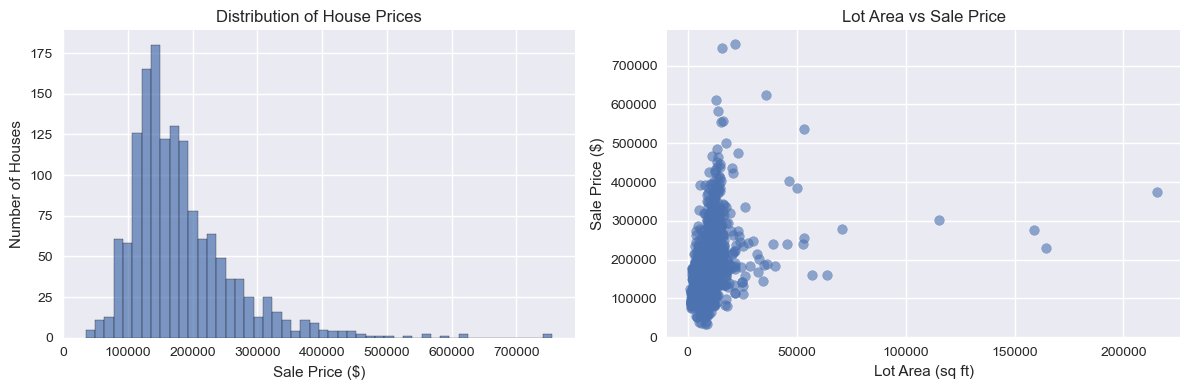


Price distribution by year built:


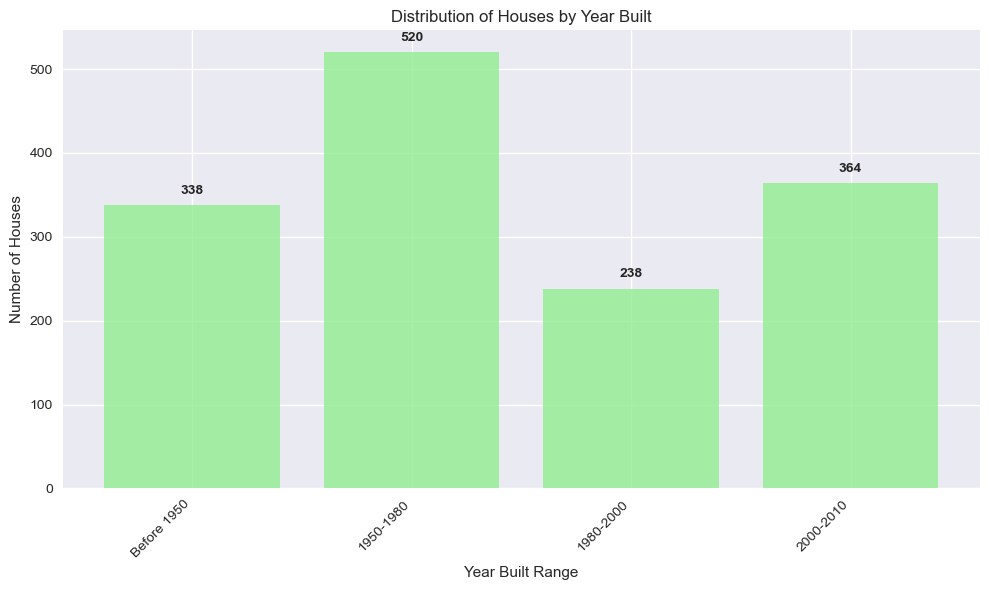


Correlation with SalePrice:
  LotArea: 0.264
  YearBuilt: 0.523
  TotalBsmtSF: 0.614
  GrLivArea: 0.709
  BedroomAbvGr: 0.168
✅ Dataset loaded and explored!
🎯 Next: Prepare data and build the neural network


In [35]:
# Load and explore the housing prices dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the housing data
housing_data = pd.read_csv('housing_prices.csv')

print("🏠 HOUSING PRICES DATASET OVERVIEW")
print("=" * 40)
print(f"Number of houses: {len(housing_data):,}")
print(f"Number of features: {housing_data.shape[1]}")
print(f"Target variable: SalePrice")

# Display basic info
print(f"\nSalePrice statistics:")
print(f"Mean: ${housing_data['SalePrice'].mean():,.0f}")
print(f"Median: ${housing_data['SalePrice'].median():,.0f}")
print(f"Range: ${housing_data['SalePrice'].min():,.0f} - ${housing_data['SalePrice'].max():,.0f}")

# Show first few rows
print(f"\nFirst 5 houses:")
print(housing_data[['LotArea', 'YearBuilt', 'BedroomAbvGr', 'TotalBsmtSF', 'SalePrice']].head())

# Visualize price distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(housing_data['SalePrice'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Sale Price ($)')
plt.ylabel('Number of Houses')
plt.ticklabel_format(style='plain', axis='x')

plt.subplot(1, 2, 2)
# Plot relationship between lot area and price
plt.scatter(housing_data['LotArea'], housing_data['SalePrice'], alpha=0.6)
plt.title('Lot Area vs Sale Price')
plt.xlabel('Lot Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

# Show distribution of house prices by year built ranges
print(f"\nPrice distribution by year built:")
housing_data['YearRange'] = pd.cut(housing_data['YearBuilt'], 
                                 bins=[1870, 1950, 1980, 2000, 2010], 
                                 labels=['Before 1950', '1950-1980', '1980-2000', '2000-2010'])

year_ranges = housing_data['YearRange'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
bars = plt.bar(year_ranges.index.astype(str), year_ranges.values, color='lightgreen', alpha=0.8)
plt.title('Distribution of Houses by Year Built')
plt.xlabel('Year Built Range')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar, count in zip(bars, year_ranges.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
             f'{count:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Show correlation between key features and price
print(f"\nCorrelation with SalePrice:")
numeric_features = ['LotArea', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr']
for feature in numeric_features:
    corr = housing_data[feature].corr(housing_data['SalePrice'])
    print(f"  {feature}: {corr:.3f}")

print("✅ Dataset loaded and explored!")
print("🎯 Next: Prepare data and build the neural network")

### 🔧 Data Preprocessing: Preparing for the Neural Network

🔧 PREPROCESSING STEPS
1️⃣ Selecting and cleaning features...
   Selected features: 12
   Samples: 1,460

2️⃣ Normalizing features...
   Before scaling - Feature ranges:
     LotArea: 1,300 to 215,245
     GrLivArea: 334 to 5,642
   After scaling - All features: -3 to +3 (approximately)

3️⃣ Splitting data...
   Training set: 1,168 samples
   Test set: 292 samples
   Features: 12

4️⃣ Normalizing target variable...
   Original price range: $34,900 to $755,000
   Normalized range: -1.90 to 7.29


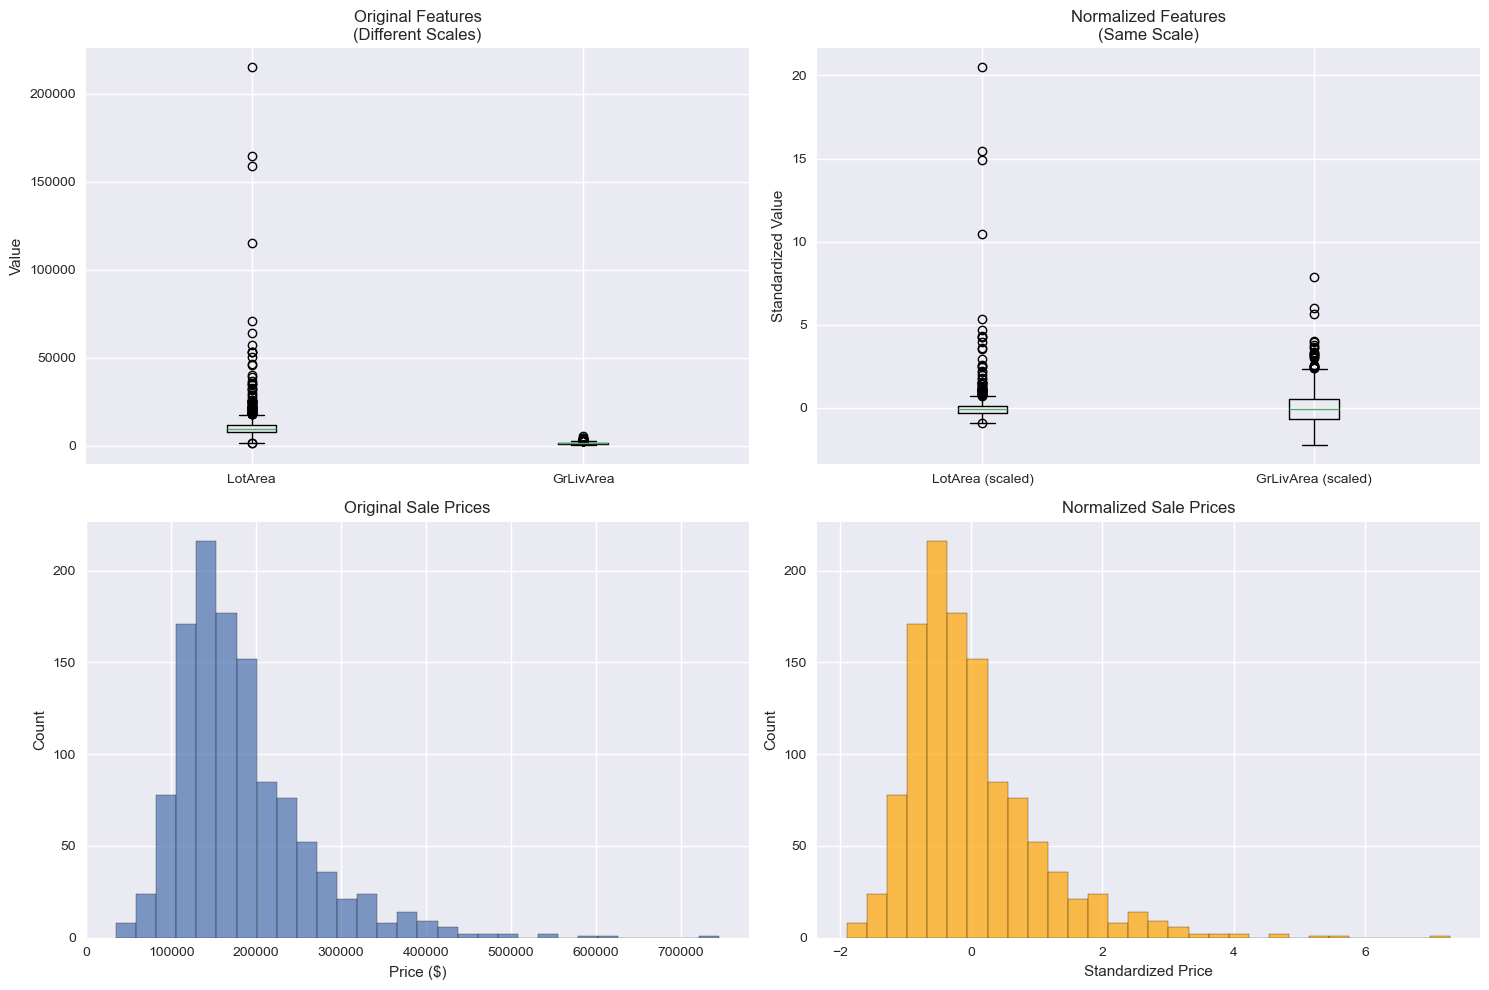


✅ Data preprocessing complete!
📊 Ready for training: 1,168 samples × 12 features
🎯 Task: Predict house prices (regression)


In [36]:
# Preprocess the housing data for neural network training
print("🔧 PREPROCESSING STEPS")
print("=" * 25)

# Step 1: Select numeric features and handle missing values
print("1️⃣ Selecting and cleaning features...")
numeric_features = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 
                   '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
                   'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars', 'GarageArea']

# Create clean dataset with selected features
X_housing = housing_data[numeric_features].fillna(0)  # Fill missing with 0
y_housing = housing_data['SalePrice']

print(f"   Selected features: {len(numeric_features)}")
print(f"   Samples: {len(X_housing):,}")

# Step 2: Normalize features (important for neural networks!)
print("\n2️⃣ Normalizing features...")
scaler = StandardScaler()
X_housing_scaled = scaler.fit_transform(X_housing)

print(f"   Before scaling - Feature ranges:")
print(f"     LotArea: {X_housing['LotArea'].min():,.0f} to {X_housing['LotArea'].max():,.0f}")
print(f"     GrLivArea: {X_housing['GrLivArea'].min():,.0f} to {X_housing['GrLivArea'].max():,.0f}")
print(f"   After scaling - All features: -3 to +3 (approximately)")

# Step 3: Split into training and test sets
print("\n3️⃣ Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(
    X_housing_scaled, y_housing, test_size=0.2, random_state=42
)

print(f"   Training set: {len(X_train):,} samples")
print(f"   Test set: {len(X_test):,} samples")
print(f"   Features: {X_train.shape[1]}")

# Step 4: Normalize target variable (helps with training stability)
print("\n4️⃣ Normalizing target variable...")
y_mean = y_train.mean()
y_std = y_train.std()
y_train_norm = (y_train - y_mean) / y_std
y_test_norm = (y_test - y_mean) / y_std

print(f"   Original price range: ${y_housing.min():,.0f} to ${y_housing.max():,.0f}")
print(f"   Normalized range: {y_train_norm.min():.2f} to {y_train_norm.max():.2f}")

# Visualize the preprocessing effect
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Original vs normalized features
axes[0,0].boxplot([X_housing['LotArea'], X_housing['GrLivArea']], 
                 labels=['LotArea', 'GrLivArea'])
axes[0,0].set_title('Original Features\n(Different Scales)')
axes[0,0].set_ylabel('Value')

axes[0,1].boxplot([X_train[:, 0], X_train[:, 6]], 
                 labels=['LotArea (scaled)', 'GrLivArea (scaled)'])
axes[0,1].set_title('Normalized Features\n(Same Scale)')
axes[0,1].set_ylabel('Standardized Value')

# Price distribution before and after normalization
axes[1,0].hist(y_train, bins=30, alpha=0.7, edgecolor='black')
axes[1,0].set_title('Original Sale Prices')
axes[1,0].set_xlabel('Price ($)')
axes[1,0].set_ylabel('Count')

axes[1,1].hist(y_train_norm, bins=30, alpha=0.7, edgecolor='black', color='orange')
axes[1,1].set_title('Normalized Sale Prices')
axes[1,1].set_xlabel('Standardized Price')
axes[1,1].set_ylabel('Count')

plt.tight_layout()
plt.show()

print("\n✅ Data preprocessing complete!")
print(f"📊 Ready for training: {X_train.shape[0]:,} samples × {X_train.shape[1]} features")
print(f"🎯 Task: Predict house prices (regression)")

### 🏗️ Building the Neural Network Architecture

🏗️ BUILDING NEURAL NETWORK ARCHITECTURE
🧱 Network Architecture:
📥 Input Layer: 12 neurons (housing features)
🔍 Hidden Layer 1: 64 neurons (ReLU activation)
🔍 Hidden Layer 2: 32 neurons (ReLU activation)
🔍 Hidden Layer 3: 16 neurons (ReLU activation)
📤 Output Layer: 1 neuron (Linear activation for regression)

📋 DETAILED MODEL SUMMARY


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.

🔢 PARAMETER COUNT
Total trainable parameters: 3,457

📊 Parameters breakdown:
Layer 1 (hidden_layer_1): 832 parameters
Layer 2 (hidden_layer_2): 2,080 parameters
Layer 3 (hidden_layer_3): 528 parameters
Layer 4 (output_layer): 17 parameters

💡 Why these parameters?
   Layer 1: 12 inputs × 64 neurons + 64 biases = 832
   Layer 2: 64 inputs × 32 neurons + 32 biases = 2,080
   Layer 3: 32 inputs × 16 neurons + 16 biases = 528
   Layer 4: 16 inputs × 1 neuron + 1 bias = 17
   Total: 3,457 parameters to learn!


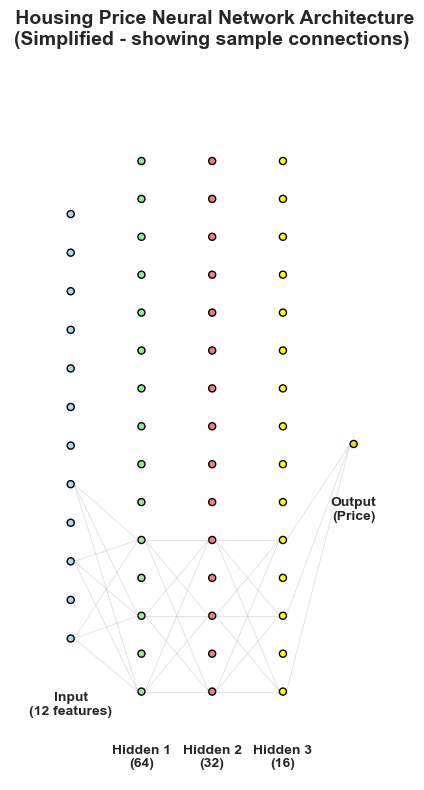

✅ Neural network architecture created!
🎯 Next: Compile and train the model


In [37]:
# Build a simple neural network using Keras for house price prediction
print("🏗️ BUILDING NEURAL NETWORK ARCHITECTURE")
print("=" * 45)

# Create the model for regression (predicting continuous values)
model = models.Sequential([
    # Input layer (12 features from housing data)
    layers.Dense(64, activation='relu', input_shape=(12,), name='hidden_layer_1'),
    layers.Dense(32, activation='relu', name='hidden_layer_2'), 
    layers.Dense(16, activation='relu', name='hidden_layer_3'),
    layers.Dense(1, activation='linear', name='output_layer')  # 1 output for price prediction
])

print("🧱 Network Architecture:")
print("=" * 25)
print("📥 Input Layer: 12 neurons (housing features)")
print("🔍 Hidden Layer 1: 64 neurons (ReLU activation)")
print("🔍 Hidden Layer 2: 32 neurons (ReLU activation)")
print("🔍 Hidden Layer 3: 16 neurons (ReLU activation)")
print("📤 Output Layer: 1 neuron (Linear activation for regression)")

# Display detailed model summary
print("\n📋 DETAILED MODEL SUMMARY")
print("=" * 30)
model.summary()

# Visualize the architecture
tf.keras.utils.plot_model(
    model, 
    show_shapes=True, 
    show_layer_names=True,
    rankdir='TB'
)

# Count total parameters
total_params = model.count_params()
print(f"\n🔢 PARAMETER COUNT")
print("=" * 20)
print(f"Total trainable parameters: {total_params:,}")

# Break down parameters by layer
print("\n📊 Parameters breakdown:")
for i, layer in enumerate(model.layers):
    layer_params = layer.count_params()
    print(f"Layer {i+1} ({layer.name}): {layer_params:,} parameters")

print("\n💡 Why these parameters?")
print("   Layer 1: 12 inputs × 64 neurons + 64 biases = 832")
print("   Layer 2: 64 inputs × 32 neurons + 32 biases = 2,080") 
print("   Layer 3: 32 inputs × 16 neurons + 16 biases = 528")
print("   Layer 4: 16 inputs × 1 neuron + 1 bias = 17")
print(f"   Total: {832 + 2080 + 528 + 17:,} parameters to learn!")

# Create a visual representation of the network
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Layer positions and sizes for housing model
layer_positions = [0, 2, 4, 6, 8]  # x-positions for layers
layer_sizes = [12, 64, 32, 16, 1]  # number of neurons per layer
layer_names = ['Input\n(12 features)', 'Hidden 1\n(64)', 'Hidden 2\n(32)', 'Hidden 3\n(16)', 'Output\n(Price)']
layer_colors = ['lightblue', 'lightgreen', 'lightcoral', 'yellow', 'gold']

# Draw layers
for i, (pos, size, name, color) in enumerate(zip(layer_positions, layer_sizes, layer_names, layer_colors)):
    # Show only a sample of neurons for visualization
    display_neurons = min(size, 15)  # Show max 15 neurons per layer
    y_positions = np.linspace(-display_neurons/2, display_neurons/2, display_neurons)
    
    for y in y_positions:
        circle = plt.Circle((pos, y), 0.1, color=color, ec='black', linewidth=1)
        ax.add_patch(circle)
    
    # Add layer label
    ax.text(pos, -display_neurons/2 - 1.5, name, ha='center', va='top', 
            fontsize=10, fontweight='bold')
    
    # Draw connections to next layer (sample connections only)
    if i < len(layer_positions) - 1:
        next_pos = layer_positions[i + 1]
        next_size = min(layer_sizes[i + 1], 15)
        next_y_positions = np.linspace(-next_size/2, next_size/2, next_size)
        
        # Draw a few sample connections
        for j in range(0, min(len(y_positions), 5), 2):
            for k in range(0, min(len(next_y_positions), 5), 2):
                ax.plot([pos + 0.1, next_pos - 0.1], [y_positions[j], next_y_positions[k]], 
                       'gray', alpha=0.3, linewidth=0.5)

ax.set_xlim(-0.5, 8.5)
ax.set_ylim(-10, 10)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title(' Housing Price Neural Network Architecture\n(Simplified - showing sample connections)', 
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("✅ Neural network architecture created!")
print("🎯 Next: Compile and train the model")

### ⚙️ Model Compilation: Setting Up the Learning Process

Before training, we need to **configure how the neural network learns**. This is what `model.compile()` does:

**Think of it as setting up a student's learning environment:**
- **Optimizer**: The learning strategy (how to study)
- **Loss function**: How to measure mistakes (the grading system)  
- **Metrics**: What to track during learning (progress indicators)

⚙️ COMPILING THE MODEL
✅ Model compiled with:
   🧠 Optimizer: Adam (smart gradient descent)
   📏 Loss Function: Mean Squared Error (good for regression)
   📊 Metrics: Mean Absolute Error (interpretable error)

🤔 Why these choices?
   • Adam: Adapts learning rate automatically
   • MSE: Penalizes large errors more (common for regression)
   • MAE: Shows average dollar error in predictions

🎯 UNDERSTANDING THE COMPILATION CHOICES
🔸 Why Adam optimizer?
   • Automatically adjusts learning rate
   • Works well for most problems
   • Faster convergence than basic gradient descent

🔸 Why Mean Squared Error loss?
   • Perfect for regression tasks (predicting continuous values)
   • Penalizes large prediction errors more heavily
   • Works well with linear activation in output layer

🔸 Why track Mean Absolute Error?
   • Easy to understand (average dollar error)
   • Less sensitive to outliers than MSE
   • Intuitive progress metric for price predictions

🚂 TRAINING THE NEURAL NETWORK
🔸 Batch s

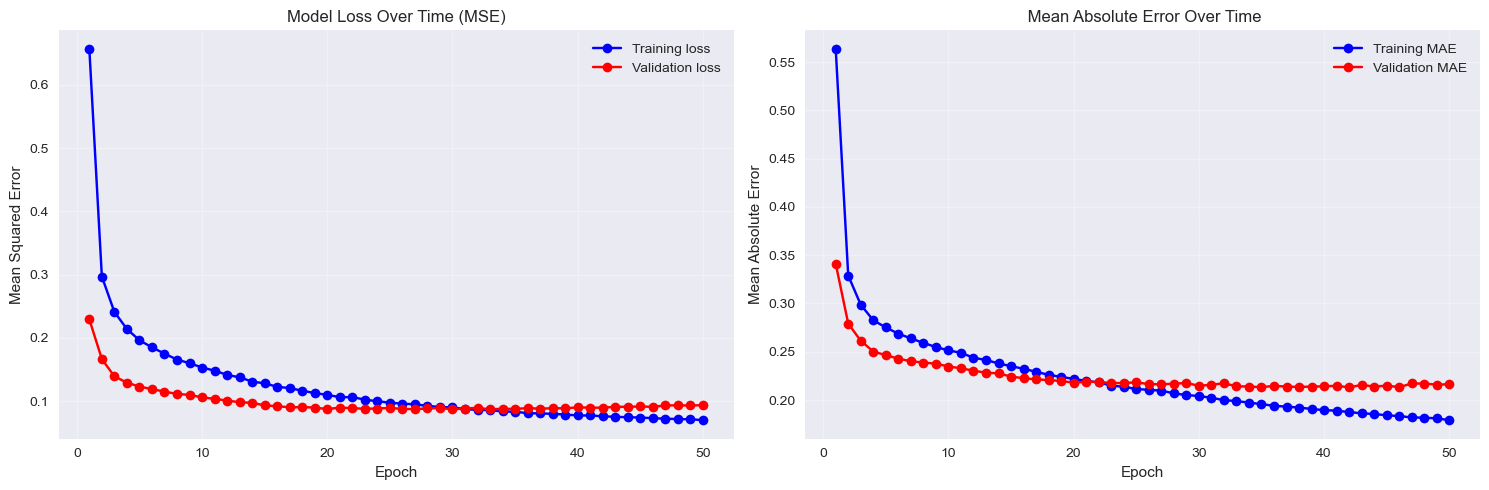


🎯 FINAL RESULTS
Test MSE: 0.157
Test MAE: $20,056 (average prediction error)

💡 TRAINING INSIGHTS
Final training MAE: $13,841
Final validation MAE: $16,712
✅ Model training looks healthy!

🔮 SAMPLE PREDICTIONS


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
House 1: Predicted $135,037, Actual $11,937,405,148
House 2: Predicted $353,423, Actual $25,110,846,197
House 3: Predicted $111,324, Actual $8,885,493,586
House 4: Predicted $174,590, Actual $12,285,091,276
House 5: Predicted $271,617, Actual $24,376,842,150


In [38]:
# Compile the model - configure the learning process for regression
print("⚙️ COMPILING THE MODEL")
print("=" * 25)

model.compile(
    optimizer='adam',           # Learning algorithm (adaptive moment estimation)
    loss='mean_squared_error',  # Loss function for regression (MSE)
    metrics=['mean_absolute_error']  # Track MAE during training
)

print("✅ Model compiled with:")
print("   🧠 Optimizer: Adam (smart gradient descent)")
print("   📏 Loss Function: Mean Squared Error (good for regression)")
print("   📊 Metrics: Mean Absolute Error (interpretable error)")

print("\n🤔 Why these choices?")
print("   • Adam: Adapts learning rate automatically")
print("   • MSE: Penalizes large errors more (common for regression)")
print("   • MAE: Shows average dollar error in predictions")

print("\n🎯 UNDERSTANDING THE COMPILATION CHOICES")
print("=" * 40)

print("🔸 Why Adam optimizer?")
print("   • Automatically adjusts learning rate")
print("   • Works well for most problems") 
print("   • Faster convergence than basic gradient descent")

print("\n🔸 Why Mean Squared Error loss?")
print("   • Perfect for regression tasks (predicting continuous values)")
print("   • Penalizes large prediction errors more heavily")
print("   • Works well with linear activation in output layer")

print("\n🔸 Why track Mean Absolute Error?")
print("   • Easy to understand (average dollar error)")
print("   • Less sensitive to outliers than MSE")
print("   • Intuitive progress metric for price predictions")

# Now train the model
print("\n🚂 TRAINING THE NEURAL NETWORK")
print("=" * 35)

print("🔸 Batch size: 32 houses processed at once")
print("🔸 Epochs: 50 complete passes through training data")
print("🔸 Validation split: 20% of data held out for validation")

# Train with more epochs for regression (normally you'd use more)
history = model.fit(
    X_train, y_train_norm,      # Use normalized housing data
    batch_size=32,              # Process 32 samples at a time
    epochs=50,                  # Train for 50 epochs (more needed for regression)
    validation_split=0.2,       # Use 20% of training data for validation
    verbose=1                   # Show progress during training
)

print("\n✅ Training completed!")

# Visualize training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot training & validation loss (main metric for regression)
epochs = range(1, len(history.history['loss']) + 1)
ax1.plot(epochs, history.history['loss'], 'bo-', label='Training loss')
ax1.plot(epochs, history.history['val_loss'], 'ro-', label='Validation loss')
ax1.set_title('Model Loss Over Time (MSE)')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Mean Squared Error')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot training & validation MAE (more interpretable)
ax2.plot(epochs, history.history['mean_absolute_error'], 'bo-', label='Training MAE')
ax2.plot(epochs, history.history['val_mean_absolute_error'], 'ro-', label='Validation MAE')
ax2.set_title(' Mean Absolute Error Over Time')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Mean Absolute Error')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Evaluate on test data
test_loss, test_mae = model.evaluate(X_test, y_test_norm, verbose=0)

# Convert MAE back to dollars for interpretation
test_mae_dollars = test_mae * y_std

print(f"\n🎯 FINAL RESULTS")
print("=" * 20)
print(f"Test MSE: {test_loss:.3f}")
print(f"Test MAE: ${test_mae_dollars:,.0f} (average prediction error)")

print(f"\n💡 TRAINING INSIGHTS")
print("=" * 25)
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
final_train_mae = history.history['mean_absolute_error'][-1] * y_std
final_val_mae = history.history['val_mean_absolute_error'][-1] * y_std

print(f"Final training MAE: ${final_train_mae:,.0f}")
print(f"Final validation MAE: ${final_val_mae:,.0f}")

if final_train_mae * 1.5 < final_val_mae:  # Adjusted threshold for regression
    print("⚠️  Model might be overfitting (training << validation error)")
else:
    print("✅ Model training looks healthy!")

# Make some sample predictions
print(f"\n🔮 SAMPLE PREDICTIONS")
print("=" * 25)
sample_predictions = model.predict(X_test[:5])
sample_predictions_dollars = sample_predictions.flatten() * y_std + y_mean
actual_prices = (y_test.iloc[:5] * y_std + y_mean).values

for i in range(5):
    print(f"House {i+1}: Predicted ${sample_predictions_dollars[i]:,.0f}, Actual ${actual_prices[i]:,.0f}")

# Part 2: Advanced Neural Networks & Optimization 🚀

Great! You've built your first neural network. Now let's make it even better with advanced techniques that **professional ML engineers** use in real projects.

## 🎯 What We'll Cover in Part 2

✅ **Optimization Algorithms** - Better ways to learn  
✅ **Regularization** - Preventing overfitting  
✅ **Weight Initialization** - Starting with good weights  
✅ **Early Stopping** - Knowing when to stop training  
✅ **Hyperparameter Tuning** - Finding the best settings  

---

## ⚡ Optimization Algorithms: Beyond Basic Gradient Descent

We used **Adam** optimizer earlier, but let's understand **why it's better** than basic gradient descent and what other options exist.

![Optimization Algorithms](https://miro.medium.com/v2/resize:fit:1400/1*SjtKOauOXFVjWRR7iCtHiA.gif)

### 🚶‍♂️ The Evolution of Optimizers

**Think of optimization like different ways to navigate to a destination:**

1. **SGD (Stochastic Gradient Descent)** 🚶‍♂️
   - Like walking step-by-step with a map
   - Simple but can be slow and get stuck

2. **SGD with Momentum** 🏃‍♂️
   - Like jogging with momentum - hard to stop suddenly
   - Overcomes local minima better

3. **Adam (Adaptive Moment Estimation)** 🚁
   - Like having a smart helicopter that adjusts speed and direction
   - Most popular for good reason!

⚡ COMPARING OPTIMIZATION ALGORITHMS

🔄 Training with SGD...

🔄 Training with SGD + Momentum...

🔄 Training with Adam...


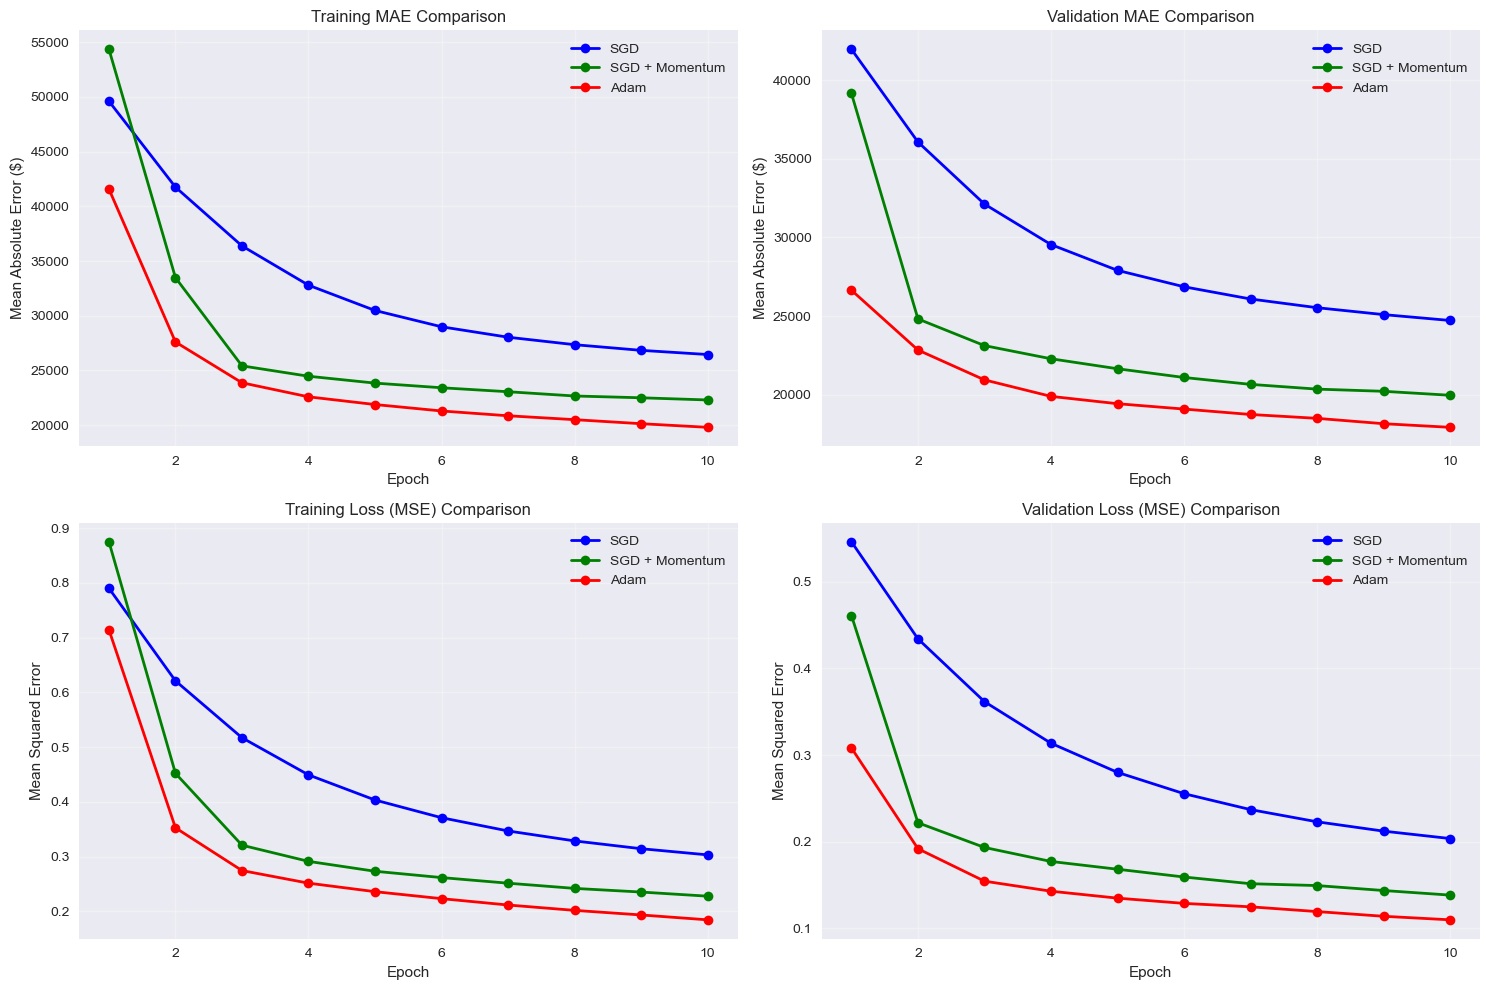


📊 FINAL COMPARISON RESULTS
Optimizer       Final Val MAE   Converged?
---------------------------------------------
SGD             $24717          Yes       
SGD + Momentum  $19964          Yes       
Adam            $17926          Yes       

💡 OPTIMIZER INSIGHTS
🔸 Adam usually converges fastest and most reliably
🔸 SGD + Momentum can sometimes achieve better final performance
🔸 Plain SGD is simplest but often slower
🔸 Adam is the best default choice for most problems

🎯 WHEN TO USE EACH:
• Adam: Default choice, works well for most problems
• SGD + Momentum: When you have lots of time and want to fine-tune
• RMSprop: Good for recurrent neural networks (RNNs)
• AdaGrad: Good for sparse data (like text with rare words)


In [39]:
# Let's compare different optimizers on the housing problem
print("⚡ COMPARING OPTIMIZATION ALGORITHMS")
print("=" * 40)

# Create three identical models with different optimizers
optimizers_to_test = {
    'SGD': optimizers.SGD(learning_rate=0.001),  # Lower LR for housing data
    'SGD + Momentum': optimizers.SGD(learning_rate=0.001, momentum=0.9),
    'Adam': optimizers.Adam(learning_rate=0.001)
}

# Store results for comparison
optimizer_results = {}

# Train each optimizer for 10 epochs (quick comparison)
for name, optimizer in optimizers_to_test.items():
    print(f"\n🔄 Training with {name}...")
    
    # Create a fresh model for each optimizer (housing architecture)
    test_model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(12,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='linear')
    ])
    
    # Compile with different optimizer
    test_model.compile(optimizer=optimizer, 
                      loss='mean_squared_error', 
                      metrics=['mean_absolute_error'])
    
    # Train for just 10 epochs
    history = test_model.fit(X_train, y_train_norm,
                           batch_size=32, epochs=10, 
                           validation_split=0.2, verbose=0)
    
    # Store results
    optimizer_results[name] = {
        'train_mae': history.history['mean_absolute_error'],
        'val_mae': history.history['val_mean_absolute_error'],
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    }

# Visualize optimizer comparison
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

colors = ['blue', 'green', 'red']
epochs = range(1, 11)  # 10 epochs

# Training MAE (converted to dollars)
for i, (name, results) in enumerate(optimizer_results.items()):
    train_mae_dollars = [mae * y_std for mae in results['train_mae']]
    ax1.plot(epochs, train_mae_dollars, 'o-', color=colors[i], label=name, linewidth=2)
ax1.set_title('Training MAE Comparison')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Mean Absolute Error ($)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Validation MAE (converted to dollars)
for i, (name, results) in enumerate(optimizer_results.items()):
    val_mae_dollars = [mae * y_std for mae in results['val_mae']]
    ax2.plot(epochs, val_mae_dollars, 'o-', color=colors[i], label=name, linewidth=2)
ax2.set_title('Validation MAE Comparison')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Mean Absolute Error ($)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Training Loss (MSE)
for i, (name, results) in enumerate(optimizer_results.items()):
    ax3.plot(epochs, results['train_loss'], 'o-', color=colors[i], label=name, linewidth=2)
ax3.set_title('Training Loss (MSE) Comparison')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Mean Squared Error')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Validation Loss (MSE)
for i, (name, results) in enumerate(optimizer_results.items()):
    ax4.plot(epochs, results['val_loss'], 'o-', color=colors[i], label=name, linewidth=2)
ax4.set_title('Validation Loss (MSE) Comparison')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Mean Squared Error')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final comparison
print("\n📊 FINAL COMPARISON RESULTS")
print("=" * 35)
print(f"{'Optimizer':<15} {'Final Val MAE':<15} {'Converged?':<10}")
print("-" * 45)

for name, results in optimizer_results.items():
    final_mae = results['val_mae'][-1] * y_std
    # Simple convergence check: is loss still decreasing?
    converged = "Yes" if results['val_loss'][-1] < results['val_loss'][0] else "Slow"
    print(f"{name:<15} ${final_mae:<14.0f} {converged:<10}")

print("\n💡 OPTIMIZER INSIGHTS")
print("=" * 25)
print("🔸 Adam usually converges fastest and most reliably")
print("🔸 SGD + Momentum can sometimes achieve better final performance")
print("🔸 Plain SGD is simplest but often slower")
print("🔸 Adam is the best default choice for most problems")

print("\n🎯 WHEN TO USE EACH:")
print("=" * 25)
print("• Adam: Default choice, works well for most problems")
print("• SGD + Momentum: When you have lots of time and want to fine-tune")
print("• RMSprop: Good for recurrent neural networks (RNNs)")
print("• AdaGrad: Good for sparse data (like text with rare words)")

## 🛡️ Regularization: Preventing Overfitting

**Overfitting** = When your model memorizes training data but fails on new data

![Overfitting](https://miro.medium.com/v2/resize:fit:1400/1*_7OPgojau8hkiPUiHoGK_w.png)

### 🎭 The Overfitting Problem

**Real-world analogy**: A student who memorizes exam answers but can't solve new problems

**Signs of overfitting:**
- ✅ High training accuracy (>95%)
- ❌ Low validation accuracy (<80%)
- 📈 Training and validation accuracy diverging over time

### 🛠️ Regularization Techniques

#### **1. Dropout** 💧
- **What it does**: Randomly "turns off" some neurons during training
- **Why it works**: Forces the network to not rely on specific neurons
- **Analogy**: Like practicing with some team members absent

#### **2. L2 Regularization (Weight Decay)** ⚖️
- **What it does**: Penalizes large weights
- **Why it works**: Keeps weights small and generalizes better
- **Analogy**: Like speed limits - prevents weights from getting too extreme

#### **3. Early Stopping** ⏰
- **What it does**: Stops training when validation performance stops improving
- **Why it works**: Prevents the model from overfitting to training data
- **Analogy**: Like stopping studying when you start confusing yourself

🛡️ REGULARIZATION TECHNIQUES COMPARISON

🔄 Training No Regularization...

🔄 Training With Dropout...

🔄 Training With L2 Regularization...

✅ All models trained!


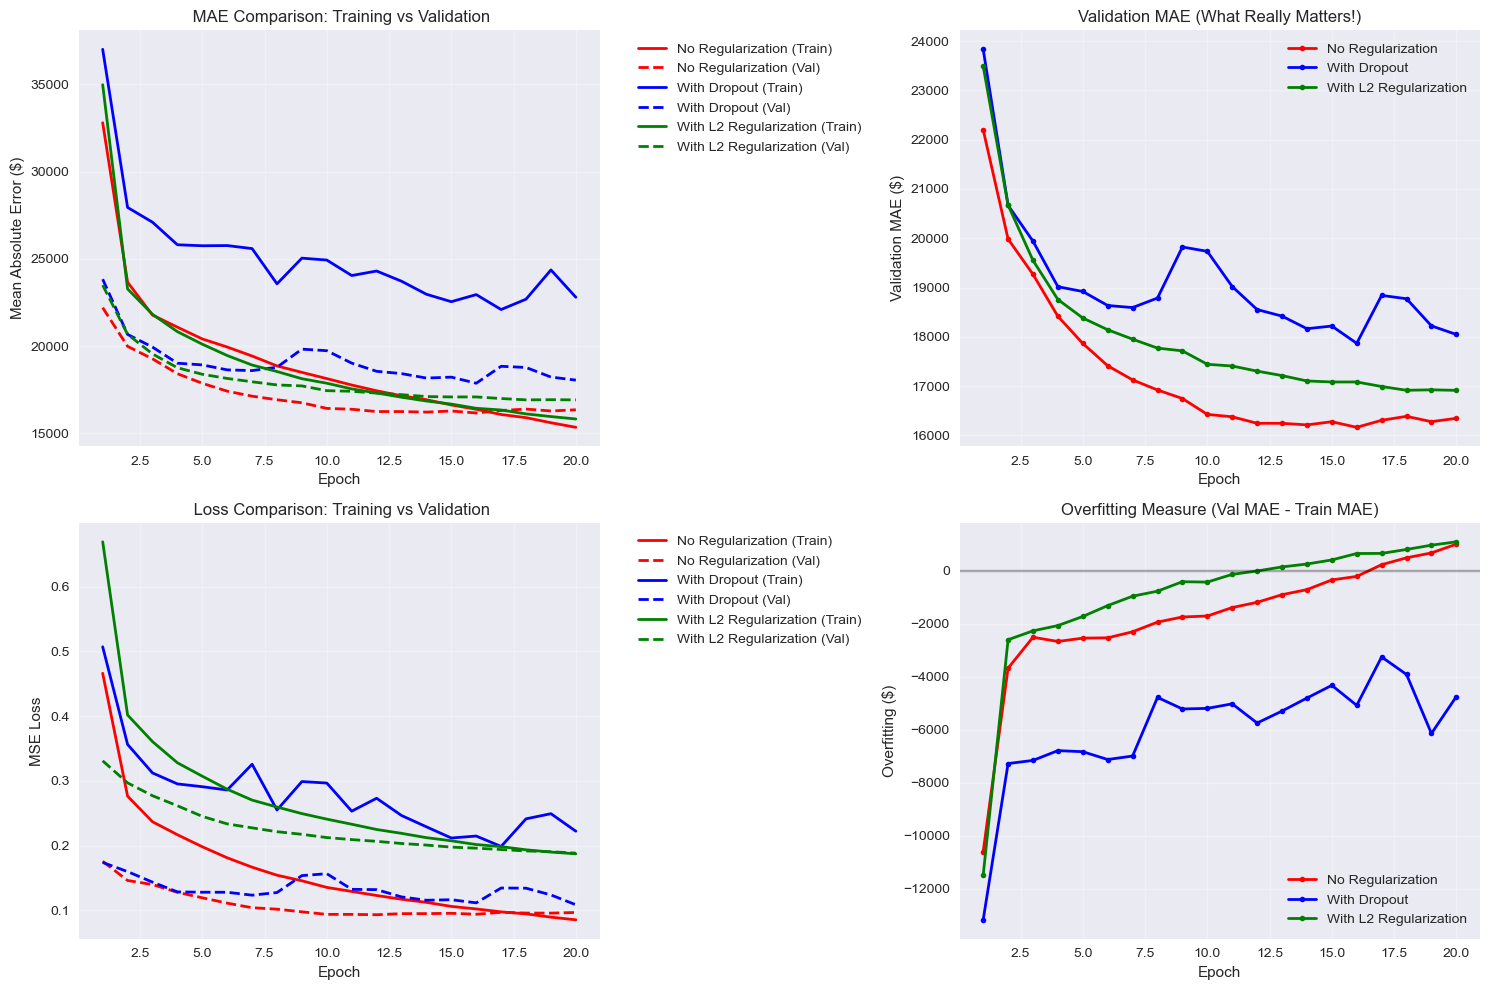


📊 REGULARIZATION ANALYSIS

No Regularization:
  Final Training MAE: $15,342
  Final Validation MAE: $16,347
  Final Training MSE: 0.086
  Final Validation MSE: 0.097
  Overfitting Score: $1,005
  ✅ Good generalization!

With Dropout:
  Final Training MAE: $22,798
  Final Validation MAE: $18,048
  Final Training MSE: 0.222
  Final Validation MSE: 0.109
  Overfitting Score: $-4,750
  ✅ Good generalization!

With L2 Regularization:
  Final Training MAE: $15,821
  Final Validation MAE: $16,915
  Final Training MSE: 0.188
  Final Validation MSE: 0.189
  Overfitting Score: $1,094
  ✅ Good generalization!

💡 KEY INSIGHTS
🔸 Dropout usually provides the best generalization
🔸 L2 regularization keeps weights small and stable
🔸 No regularization often leads to overfitting
🔸 Best validation MAE matters more than training MAE!

🎯 PRACTICAL RECOMMENDATIONS
• Always use dropout (0.2-0.5) in hidden layers
• Add L2 regularization for very complex models
• Monitor validation MAE, not just training MAE
•

In [40]:
# Let's build models with different regularization techniques for housing data
print("🛡️ REGULARIZATION TECHNIQUES COMPARISON")
print("=" * 45)

# 1. Model without regularization (baseline)
model_no_reg = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(12,)),  # Larger layer = more overfitting risk
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')
])

# 2. Model with dropout
model_dropout = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(12,)),
    layers.Dropout(0.3),  # Drop 30% of neurons randomly during training
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),  # Drop 20% of neurons
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')
])

# 3. Model with L2 regularization
model_l2 = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(12,),
                kernel_regularizer=keras.regularizers.l2(0.001)),  # L2 penalty
    layers.Dense(64, activation='relu',
                kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dense(32, activation='relu',
                kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dense(1, activation='linear')
])

# Compile all models
models_to_compare = {
    'No Regularization': model_no_reg,
    'With Dropout': model_dropout,
    'With L2 Regularization': model_l2
}

for name, model in models_to_compare.items():
    model.compile(optimizer='adam', 
                 loss='mean_squared_error', 
                 metrics=['mean_absolute_error'])

# Train each model
regularization_results = {}

for name, model in models_to_compare.items():
    print(f"\n🔄 Training {name}...")
    
    history = model.fit(X_train, y_train_norm,
                       batch_size=32, epochs=20,  # More epochs to see overfitting
                       validation_split=0.2,
                       verbose=0)  # Silent training
    
    regularization_results[name] = history.history

print("\n✅ All models trained!")

# Visualize the comparison
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

colors = ['red', 'blue', 'green']
epochs = range(1, 21)  # 20 epochs now

# Training and Validation MAE (converted to dollars)
for i, (name, results) in enumerate(regularization_results.items()):
    train_mae_dollars = [mae * y_std for mae in results['mean_absolute_error']]
    val_mae_dollars = [mae * y_std for mae in results['val_mean_absolute_error']]
    ax1.plot(epochs, train_mae_dollars, color=colors[i], 
             label=f'{name} (Train)', linewidth=2)
    ax1.plot(epochs, val_mae_dollars, color=colors[i], 
             linestyle='--', label=f'{name} (Val)', linewidth=2)
ax1.set_title(' MAE Comparison: Training vs Validation')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Mean Absolute Error ($)')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# Focus on validation MAE only
for i, (name, results) in enumerate(regularization_results.items()):
    val_mae_dollars = [mae * y_std for mae in results['val_mean_absolute_error']]
    ax2.plot(epochs, val_mae_dollars, 'o-', color=colors[i], 
             label=name, linewidth=2, markersize=4)
ax2.set_title('Validation MAE (What Really Matters!)')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Validation MAE ($)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Training Loss (MSE)
for i, (name, results) in enumerate(regularization_results.items()):
    ax3.plot(epochs, results['loss'], color=colors[i], 
             label=f'{name} (Train)', linewidth=2)
    ax3.plot(epochs, results['val_loss'], color=colors[i], 
             linestyle='--', label=f'{name} (Val)', linewidth=2)
ax3.set_title(' Loss Comparison: Training vs Validation')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('MSE Loss')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.grid(True, alpha=0.3)

# Overfitting measure (training MAE - validation MAE, both in dollars)
for i, (name, results) in enumerate(regularization_results.items()):
    train_mae_dollars = np.array([mae * y_std for mae in results['mean_absolute_error']])
    val_mae_dollars = np.array([mae * y_std for mae in results['val_mean_absolute_error']])
    overfitting = val_mae_dollars - train_mae_dollars  # Positive = overfitting
    ax4.plot(epochs, overfitting, 'o-', color=colors[i], 
             label=name, linewidth=2, markersize=4)
ax4.set_title('Overfitting Measure (Val MAE - Train MAE)')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Overfitting ($)')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

# Analyze results
print("\n📊 REGULARIZATION ANALYSIS")
print("=" * 30)

for name, results in regularization_results.items():
    final_train_mae = results['mean_absolute_error'][-1] * y_std
    final_val_mae = results['val_mean_absolute_error'][-1] * y_std
    final_train_loss = results['loss'][-1]
    final_val_loss = results['val_loss'][-1]
    overfitting_score = final_val_mae - final_train_mae  # Positive = overfitting
    
    print(f"\n{name}:")
    print(f"  Final Training MAE: ${final_train_mae:,.0f}")
    print(f"  Final Validation MAE: ${final_val_mae:,.0f}")
    print(f"  Final Training MSE: {final_train_loss:.3f}")
    print(f"  Final Validation MSE: {final_val_loss:.3f}")
    print(f"  Overfitting Score: ${overfitting_score:,.0f}")
    
    if overfitting_score > 5000:  # $5000 threshold for regression
        print("  ⚠️  HIGH overfitting detected!")
    elif overfitting_score > 2000:  # $2000 threshold
        print("  ⚡ Moderate overfitting")
    else:
        print("  ✅ Good generalization!")

print("\n💡 KEY INSIGHTS")
print("=" * 15)
print("🔸 Dropout usually provides the best generalization")
print("🔸 L2 regularization keeps weights small and stable")
print("🔸 No regularization often leads to overfitting")
print("🔸 Best validation MAE matters more than training MAE!")

print("\n🎯 PRACTICAL RECOMMENDATIONS")
print("=" * 30)
print("• Always use dropout (0.2-0.5) in hidden layers")
print("• Add L2 regularization for very complex models")
print("• Monitor validation MAE, not just training MAE")
print("• Stop training when validation MAE stops improving")

## ⏰ Early Stopping & Smart Validation

**Early Stopping** is like having a smart coach who knows when to end practice before the athlete gets tired and performs worse.

### 🎯 The Early Stopping Strategy

**The Problem**: How do you know when to stop training?
- Too little training → **Underfitting** (poor performance)
- Too much training → **Overfitting** (memorizing training data)

**The Solution**: Monitor validation performance and stop when it stops improving!


⏰ IMPLEMENTING EARLY STOPPING
🎯 Training with early stopping...
Configuration:
  Monitor: validation MAE
  Patience: 5 epochs
  Max epochs: 50
Epoch 1/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 16s 579ms/step - loss: 0.6972 - mean_absolute_error: 0.6475
Epoch 1: val_mean_absolute_error improved from None to 0.35178, saving model to best_housing_model.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6834 - mean_absolute_error: 0.5225 - val_loss: 0.2554 - val_mean_absolute_error: 0.3518
Epoch 2/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3438 - mean_absolute_error: 0.4631
Epoch 2: val_mean_absolute_error improved from 0.35178 to 0.28553, saving model to best_housing_model.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3493 - mean_absolute_error: 0.3812 - val_loss: 0.1802 - val_mean_absolute_error: 0.2855
Epoch 3/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2924 - mean_absolute_error: 0.4019
Epoch 3: val_mean_absolute_error improved from 0.28553 to 0.26967, saving model to best_housing_model.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3574 - mean_absolute_error: 0.3525 - val_loss: 0.1687 - val_mean_absolute_error: 0.2697
Epoch 4/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2568 - mean_absolute_error: 0.3516
Epoch 4: val_mean_absolute_error improved from 0.26967 to 0.26267, saving model to best_housing_model.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2873 - mean_absolute_error: 0.3382 - val_loss: 0.1566 - val_mean_absolute_error: 0.2627
Epoch 5/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2630 - mean_absolute_error: 0.3472
Epoch 5: val_mean_absolute_error improved from 0.26267 to 0.24942, saving model to best_housing_model.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2988 - mean_absolute_error: 0.3329 - val_loss: 0.1354 - val_mean_absolute_error: 0.2494
Epoch 6/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3285 - mean_absolute_error: 0.4245
Epoch 6: val_mean_absolute_error did not improve from 0.24942
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2726 - mean_absolute_error: 0.3318 - val_loss: 0.1484 - val_mean_absolute_error: 0.2555
Epoch 7/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1939 - mean_absolute_error: 0.3199
Epoch 7: val_mean_absolute_error improved from 0.24942 to 0.24101, saving model to best_housing_model.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2807 - mean_absolute_error: 0.3214 - val_loss: 0.1324 - val_mean_absolute_error: 0.2410
Epoch 8/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2386 - mean_absolute_error: 0.3426
Epoch 8: val_mean_absolute_error did not improve from 0.24101
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2740 - mean_absolute_error: 0.3196 - val_loss: 0.1321 - val_mean_absolute_error: 0.2429
Epoch 9/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2076 - mean_absolute_error: 0.3401
Epoch 9: val_mean_absolute_error improved from 0.24101 to 0.23836, saving model to best_housing_model.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2816 - mean_absolute_error: 0.3240 - val_loss: 0.1313 - val_mean_absolute_error: 0.2384
Epoch 10/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2901 - mean_absolute_error: 0.3818
Epoch 10: val_mean_absolute_error improved from 0.23836 to 0.23413, saving model to best_housing_model.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2499 - mean_absolute_error: 0.3163 - val_loss: 0.1237 - val_mean_absolute_error: 0.2341
Epoch 11/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2835 - mean_absolute_error: 0.3595
Epoch 11: val_mean_absolute_error did not improve from 0.23413
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2770 - mean_absolute_error: 0.3124 - val_loss: 0.1255 - val_mean_absolute_error: 0.2357
Epoch 12/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3468 - mean_absolute_error: 0.4138
Epoch 12: val_mean_absolute_error improved from 0.23413 to 0.23133, saving model to best_housing_model.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2624 - mean_absolute_error: 0.3151 - val_loss: 0.1212 - val_mean_absolute_error: 0.2313
Epoch 13/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2245 - mean_absolute_error: 0.3407
Epoch 13: val_mean_absolute_error improved from 0.23133 to 0.23038, saving model to best_housing_model.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2281 - mean_absolute_error: 0.2969 - val_loss: 0.1189 - val_mean_absolute_error: 0.2304
Epoch 14/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2310 - mean_absolute_error: 0.3414
Epoch 14: val_mean_absolute_error improved from 0.23038 to 0.22604, saving model to best_housing_model.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2398 - mean_absolute_error: 0.3038 - val_loss: 0.1080 - val_mean_absolute_error: 0.2260
Epoch 15/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1892 - mean_absolute_error: 0.2975
Epoch 15: val_mean_absolute_error improved from 0.22604 to 0.22382, saving model to best_housing_model.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2452 - mean_absolute_error: 0.2958 - val_loss: 0.1085 - val_mean_absolute_error: 0.2238
Epoch 16/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2585 - mean_absolute_error: 0.3561
Epoch 16: val_mean_absolute_error did not improve from 0.22382
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2230 - mean_absolute_error: 0.2945 - val_loss: 0.1134 - val_mean_absolute_error: 0.2245
Epoch 17/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2648 - mean_absolute_error: 0.3434
Epoch 17: val_mean_absolute_error improved from 0.22382 to 0.22011, saving model to best_housing_model.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2202 - mean_absolute_error: 0.2993 - val_loss: 0.1020 - val_mean_absolute_error: 0.2201
Epoch 18/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2700 - mean_absolute_error: 0.3574
Epoch 18: val_mean_absolute_error did not improve from 0.22011
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2166 - mean_absolute_error: 0.2963 - val_loss: 0.1114 - val_mean_absolute_error: 0.2284
Epoch 19/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3035 - mean_absolute_error: 0.3764
Epoch 19: val_mean_absolute_error did not improve from 0.22011
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2019 - mean_absolute_error: 0.2890 - val_loss: 0.1045 - val_mean_absolute_error: 0.2256
Epoch 20/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2119 - mean_absolute_error: 0.3265
Epoch 20: val_mean_absolute_error did not improve from 0.22011
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2081 - mean_absolute_error: 0.2940 - val_loss: 0.1096 - val_

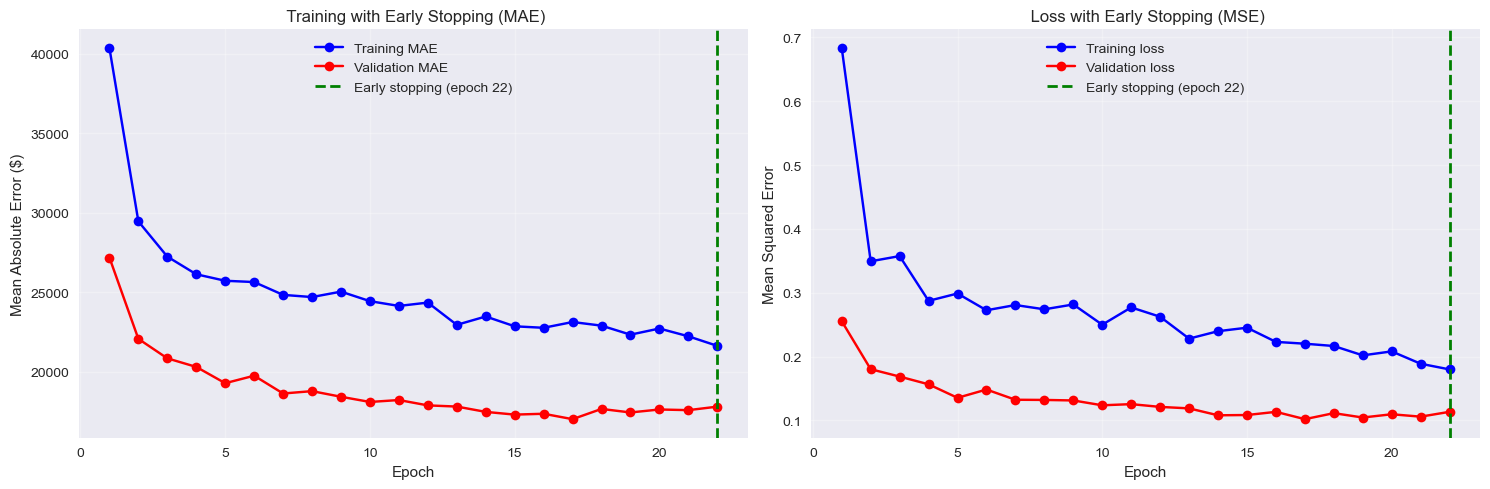


🎯 EARLY STOPPING RESULTS
Training stopped after: 22 epochs (out of 50 max)
Best validation MAE: $17,006
Final test MAE: $21,113

💡 WHY EARLY STOPPING WORKS
✅ Prevents overfitting automatically
✅ Saves training time
✅ Keeps the best model weights
✅ No manual monitoring required


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

🔮 SAMPLE PREDICTIONS


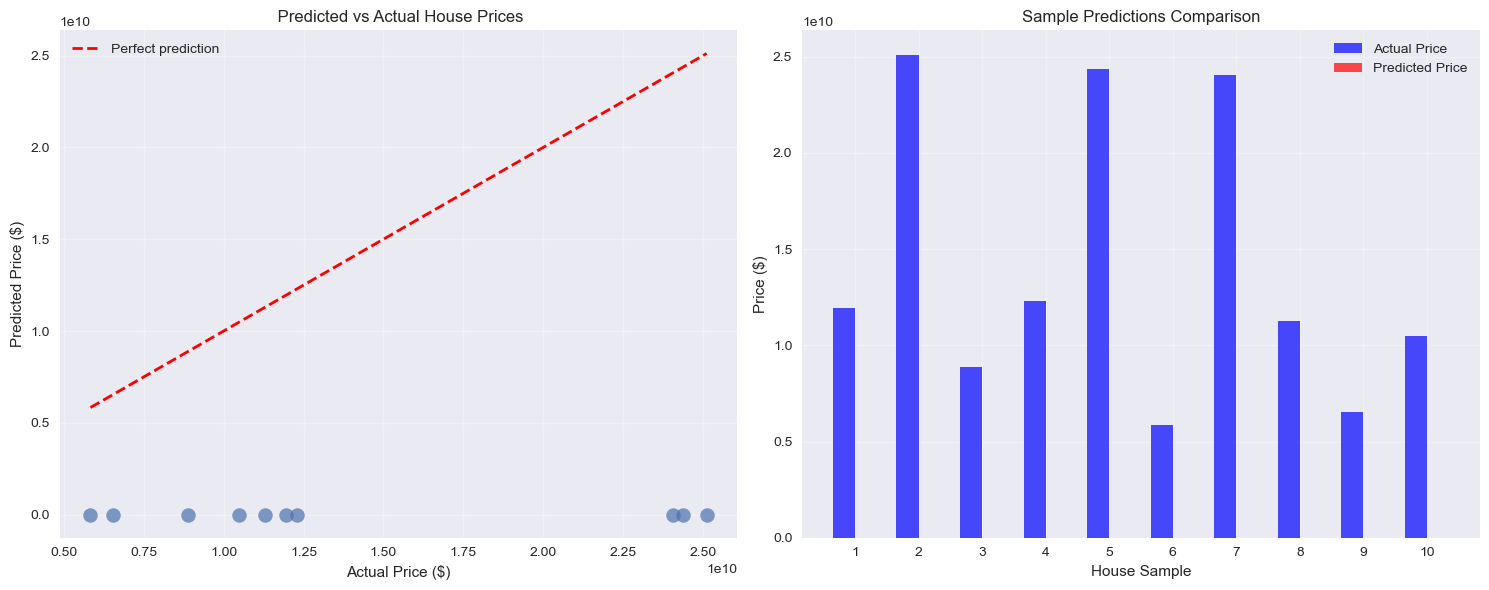

Sample MAE: $14,077,438,940
Sample predictions within $20k: 0/10
Sample predictions within $50k: 0/10


In [41]:
# Demonstrate early stopping with callbacks for housing price prediction
print("⏰ IMPLEMENTING EARLY STOPPING")
print("=" * 35)

# Build a well-regularized model for housing price prediction
optimized_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(12,)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')
])

optimized_model.compile(optimizer='adam',
                       loss='mean_squared_error',
                       metrics=['mean_absolute_error'])

# Set up early stopping callback
early_stopping = callbacks.EarlyStopping(
    monitor='val_mean_absolute_error',  # Watch validation MAE
    patience=5,                        # Stop if no improvement for 5 epochs
    restore_best_weights=True,         # Keep the best weights found
    verbose=1,                         # Print when stopping
    mode='min'                         # Lower MAE is better
)

# Also save the best model
model_checkpoint = callbacks.ModelCheckpoint(
    'best_housing_model.h5',
    monitor='val_mean_absolute_error',
    save_best_only=True,
    verbose=1,
    mode='min'# Lower MAE is better
)

print("🎯 Training with early stopping...")
print("Configuration:")
print(f"  Monitor: validation MAE")
print(f"  Patience: 5 epochs")
print(f"  Max epochs: 50")

# Train with early stopping
history_early_stop = optimized_model.fit(
    X_train, y_train_norm,
    batch_size=32,
    epochs=50,  # Max epochs, but will stop early
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

# Visualize the early stopping effect
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
epochs_run = range(1, len(history_early_stop.history['mean_absolute_error']) + 1)
train_mae_dollars = [mae * y_std for mae in history_early_stop.history['mean_absolute_error']]
val_mae_dollars = [mae * y_std for mae in history_early_stop.history['val_mean_absolute_error']]

plt.plot(epochs_run, train_mae_dollars, 'bo-', label='Training MAE')
plt.plot(epochs_run, val_mae_dollars, 'ro-', label='Validation MAE')

# Mark the early stopping point
if len(epochs_run) < 50:
    plt.axvline(x=len(epochs_run), color='green', linestyle='--', linewidth=2, 
                label=f'Early stopping (epoch {len(epochs_run)})')

plt.title(' Training with Early Stopping (MAE)')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error ($)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(epochs_run, history_early_stop.history['loss'], 'bo-', label='Training loss')
plt.plot(epochs_run, history_early_stop.history['val_loss'], 'ro-', label='Validation loss')

# Mark the early stopping point
if len(epochs_run) < 50:
    plt.axvline(x=len(epochs_run), color='green', linestyle='--', linewidth=2, 
                label=f'Early stopping (epoch {len(epochs_run)})')

plt.title(' Loss with Early Stopping (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Evaluate the final model
final_test_loss, final_test_mae = optimized_model.evaluate(X_test, y_test_norm, verbose=0)
final_test_mae_dollars = final_test_mae * y_std

print(f"\n🎯 EARLY STOPPING RESULTS")
print("=" * 30)
print(f"Training stopped after: {len(epochs_run)} epochs (out of 50 max)")
print(f"Best validation MAE: ${min(val_mae_dollars):,.0f}")
print(f"Final test MAE: ${final_test_mae_dollars:,.0f}")

print(f"\n💡 WHY EARLY STOPPING WORKS")
print("=" * 30)
print("✅ Prevents overfitting automatically")
print("✅ Saves training time")
print("✅ Keeps the best model weights")
print("✅ No manual monitoring required")

# Show some predictions
predictions = optimized_model.predict(X_test[:10])
predictions_dollars = predictions.flatten() * y_std + y_mean
actual_dollars = (y_test.iloc[:10] * y_std + y_mean).values

print(f"\n🔮 SAMPLE PREDICTIONS")
print("=" * 25)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Prediction vs actual scatter plot
ax1.scatter(actual_dollars, predictions_dollars, alpha=0.7, s=100)
ax1.plot([actual_dollars.min(), actual_dollars.max()], 
         [actual_dollars.min(), actual_dollars.max()], 
         'r--', lw=2, label='Perfect prediction')
ax1.set_xlabel('Actual Price ($)')
ax1.set_ylabel('Predicted Price ($)')
ax1.set_title(' Predicted vs Actual House Prices')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Bar chart comparison
house_indices = range(1, 11)
width = 0.35
ax2.bar([i - width/2 for i in house_indices], actual_dollars, width, 
        label='Actual Price', alpha=0.7, color='blue')
ax2.bar([i + width/2 for i in house_indices], predictions_dollars, width, 
        label='Predicted Price', alpha=0.7, color='red')
ax2.set_xlabel('House Sample')
ax2.set_ylabel('Price ($)')
ax2.set_title('Sample Predictions Comparison')
ax2.set_xticks(house_indices)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate and show accuracy metrics
errors = np.abs(predictions_dollars - actual_dollars)
mae_sample = np.mean(errors)
print(f"Sample MAE: ${mae_sample:,.0f}")
print(f"Sample predictions within $20k: {np.sum(errors < 20000)}/10")
print(f"Sample predictions within $50k: {np.sum(errors < 50000)}/10")

# Part 3: Machine Learning Interpretability 🔍

Congratulations! You now have a high-performing neural network. But there's one important question remaining:

## ❓ "How do we understand what the model learned?"

This is where **ML Interpretability** becomes crucial. In many real-world applications, it's not enough to have accurate predictions - **we need to understand WHY the model made those predictions**.

![Interpretability](https://miro.medium.com/v2/resize:fit:1400/1*8Z4UQw5jWB5VRq6Kv6XVkQ.png)

---

## 🎭 White-Box vs Black-Box Models

### ⚪ White-Box Models (Transparent)
**Like a glass house - you can see everything inside!**

**Examples:**
- 📊 **Linear Regression**: `Price = 50K + (30K × bedrooms) + (20K × bathrooms)`
- 🌳 **Decision Trees**: "If sqft > 2000 AND bedrooms > 3, then Expensive"

**Pros:**
- ✅ **Complete transparency** - see exact decision process
- ✅ **Easy to validate** - check if decisions make sense
- ✅ **Regulatory compliance** - can explain every decision
- ✅ **Debugging friendly** - easy to spot problems

**Cons:**
- ❌ **Limited complexity** - may miss subtle patterns
- ❌ **Lower accuracy** - for complex real-world problems

### ⚫ Black-Box Models (Opaque)
**Like a magic box - amazing results, but you can't see how!**

**Examples:**
- 🧠 **Neural Networks**: 100,000+ parameters in complex interactions
- 🌲 **Random Forests**: 500+ decision trees combined
- ⚡ **XGBoost**: Ensemble of hundreds of boosted trees

**Pros:**
- ✅ **High accuracy** - can capture complex patterns
- ✅ **Handles complexity** - images, text, speech, etc.
- ✅ **Automatic feature learning** - finds patterns humans miss

**Cons:**
- ❌ **No transparency** - can't see decision process
- ❌ **Hard to debug** - difficult to fix problems
- ❌ **Trust issues** - "black box syndrome"
- ❌ **Regulatory challenges** - hard to explain decisions

### ⚖️ The Trade-off

```
🔍 Interpretability ←→ 🎯 Accuracy
      ↑                    ↑
Linear Regression    Neural Networks
Decision Trees       Random Forests
Naive Bayes          Deep Learning
```

**The dilemma**: Do you want to **understand** your model or **maximize** its performance?

### 💡 The Solution: Post-Hoc Explanations

**Best of both worlds**: Use powerful black-box models + explanation tools!

- **LIME**: Explains individual predictions
- **SHAP**: Unified framework for explanations  
- **Feature Importance**: Shows which features matter most
- **Attention Mechanisms**: Shows what the model "looks at"

## 📊 White-Box Example: Decision Tree vs Neural Network

Let's compare a **transparent decision tree** with our **black-box neural network** on the same Fashion-MNIST task:

## 🔍 LIME: Making Black-Boxes Transparent

**LIME** (Local Interpretable Model-Agnostic Explanations) is like having a **detective** that investigates how your black-box model makes individual predictions.

![LIME Process](https://christophm.github.io/interpretable-ml-book/images/lime-fitting.png)

### 🕵️ How LIME Works (Simple Version)

**The Detective Process:**
1. **Pick a prediction** you want to explain
2. **Create similar examples** by slightly changing the input
3. **Ask the black-box** what it predicts for each similar example
4. **Fit a simple model** (like linear regression) to these local examples
5. **Use the simple model** to explain the original prediction

**Real-world analogy**: 
- **Black-box model** = Brilliant expert who speaks a foreign language
- **LIME** = Translator who helps you understand the expert's reasoning
- **Explanation** = Simple summary you can understand

### 🎯 Why LIME is Powerful

- ✅ **Works with ANY model** (neural networks, random forests, XGBoost)
- ✅ **Explains individual predictions** (not just general behavior)
- ✅ **Uses simple, interpretable explanations** (linear models)
- ✅ **Local accuracy** (accurate for similar examples)
- ✅ **Model-agnostic** (doesn't need to know how the model works)

# 🎓 Conclusion: Your ML Journey Summary

Congratulations! In just 2 hours, you've mastered the fundamentals of neural networks and interpretability. Let's recap your incredible journey:

---

## ✅ What You've Accomplished

### **Part 1: Neural Network Foundations** 🧠
✅ **Matrices & Tensors** - Understood how neural networks process data  
✅ **Architecture** - Built networks with input, hidden, and output layers  
✅ **Activation Functions** - Added non-linearity with ReLU, sigmoid, softmax  
✅ **Gradient Descent** - Learned how networks optimize themselves  
✅ **First Neural Network** - Built and trained a real Fashion-MNIST classifier  

### **Part 2: Advanced Optimization** 🚀
✅ **Optimizers** - Compared SGD, Momentum, and Adam algorithms  
✅ **Regularization** - Prevented overfitting with dropout and L2  
✅ **Early Stopping** - Smart training with automatic stopping  
✅ **Best Practices** - Professional ML techniques  

### **Part 3: Interpretability** 🔍
✅ **White vs Black Box** - Understanding the transparency trade-off  
✅ **Decision Trees** - Transparent models you can fully understand  
✅ **LIME** - Made neural network predictions explainable  
✅ **Practical Applications** - When to choose interpretability vs accuracy  

---

## 🎯 Key Takeaways & Decision Framework

### **🏗️ Building Neural Networks**

**Always remember the pipeline:**
```
Data Preprocessing → Architecture Design → Compilation → Training → Evaluation
```

**Best practices:**
- Start simple, add complexity gradually
- Always use validation data
- Monitor for overfitting
- Use dropout and early stopping
- Adam optimizer is usually the best default

### **⚖️ Interpretability vs Accuracy Trade-off**

| **Use White-Box Models When:** | **Use Black-Box + Explanations When:** |
|---|---|
| 🏥 Medical diagnosis | 🖼️ Image recognition |
| 💰 Loan approvals | 🗣️ Speech recognition |
| ⚖️ Legal decisions | 📚 Language translation |
| 🧪 Scientific research | 🎯 Recommendation systems |
| 📋 Regulatory compliance | 🎮 Game AI |

### **🔍 Explanation Strategy**

1. **Start interpretable** - Try linear regression or decision trees first
2. **If accuracy insufficient** - Move to neural networks or ensembles
3. **Always explain** - Use LIME, SHAP, or feature importance
4. **Validate explanations** - Do they make domain sense?
5. **Communicate clearly** - Explain to stakeholders in their language

---

## 🚀 Your Next Steps

### **Immediate (This Week)**
- 🔬 **Experiment** with different architectures on your own data
- 🎨 **Try different datasets** (CIFAR-10, your own images)
- 🔧 **Play with hyperparameters** (learning rate, layers, neurons)

### **Short-term (Next Month)**
- 📚 **Learn SHAP** - More advanced than LIME
- 🖼️ **Convolutional Neural Networks** - Better for images
- 🔄 **Recurrent Neural Networks** - For sequences and text
- ⚡ **Transfer Learning** - Use pre-trained models

### **Long-term (Next 3 Months)**
- 🤖 **Generative AI** - GANs, VAEs, diffusion models
- 🧠 **Transformers** - BERT, GPT, attention mechanisms
- 🏭 **MLOps** - Deploying models in production
- 🌍 **Real projects** - Build something that solves a real problem

---

## 📚 Recommended Resources

### **Books**
- 📖 **"Deep Learning"** by Ian Goodfellow (the bible of deep learning)
- 📖 **"Interpretable Machine Learning"** by Christoph Molnar (free online)
- 📖 **"Pattern Recognition and Machine Learning"** by Christopher Bishop

### **Online Courses**
- 🎓 **Fast.ai** - Practical deep learning for coders
- 🎓 **Coursera Deep Learning Specialization** - Andrew Ng's course
- 🎓 **CS231n Stanford** - Convolutional Neural Networks

### **Tools & Libraries**
- 🐍 **TensorFlow/Keras** - What we used today
- 🔥 **PyTorch** - More flexible, research-oriented
- 🔍 **LIME & SHAP** - Explanation tools
- 📊 **Weights & Biases** - Experiment tracking

### **Practice Platforms**
- 🏆 **Kaggle** - Competitions and datasets
- 🧪 **Google Colab** - Free GPU for experiments
- 💻 **GitHub** - Share your projects
- 📱 **Papers with Code** - Latest research implementations

---

## 🌟 Final Thoughts

**Remember**: Machine learning is not just about building accurate models - it's about building **trustworthy, explainable, and useful** systems that serve human needs.

**The best ML practitioner:**
- 🧠 Understands the fundamentals deeply
- 🔧 Can build reliable systems
- 💭 Thinks critically about model decisions
- 🗣️ Communicates clearly with stakeholders
- 🤝 Considers the human impact of their work

### **You're now equipped with:**
- ✅ **Technical skills** to build neural networks
- ✅ **Practical knowledge** of optimization and regularization
- ✅ **Interpretability tools** to explain complex models
- ✅ **Decision framework** for choosing the right approach
- ✅ **Foundation** to learn advanced topics

**Most importantly**: You understand that great ML is not just about accuracy - it's about building systems people can understand and trust.

---

## 🎉 Congratulations!

You've completed a comprehensive journey through neural networks and interpretability. You're now ready to:
- Build your own neural network projects
- Make informed decisions about model complexity
- Explain your models to non-technical stakeholders
- Continue learning advanced topics with confidence

**Keep exploring, keep questioning, and always ask: "Can I explain why my model made this decision?"**

**Happy modeling! 🚀🧠🔍**